In [66]:
"""
This section contains the configuration parameters for the fit analysis.
It includes the number of replicas for different datasets, folder paths etc.

min_number_of_events represents the minimum number of events required 
in a certain bin to consider it valid for the analysis.

x_bins_to_cut and y_bins_to_cut are lists that specify which bins to exclude 
from the analysis. In practice, the cross section values in these bins will 
be set to zero, then, bins with cross section values below a certain threshold
will be removed from the analysis.
"""

n_replicas_PDF = 20
n_replicas_D = 8
n_replicas_B = 8

folder_neutral = f'data/Fit/30_24_1_rep{n_replicas_PDF}_ev1e4/'
folder_charged = f'data/Fit/30_24_5_rep{n_replicas_PDF}_ev1e4/'

luminosity = 1.5e9
min_number_of_events = 10

x_bins_to_cut = [27, 28, 29]
y_bins_to_cut = [0, 1, 2, 3, 4]

bins_x = 30
bins_y = 24
bins_E = 5


# Analysis

## 30x24x5

### Loading Data

In [67]:
#------------- Libraries -------------#
"""
Import necessary libraries.
"""
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from scipy.linalg import block_diag



In [68]:
#------------ CKM Inputs -------------#
"""
Setting up the CKM matrix values and uncertainties.
"""
Vud_PDG = 0.97373  
Vus_PDG = 0.2243   
Vub_PDG = 0.00382  
Vcd_PDG = 0.221    
Vcs_PDG = 0.975  
Vcb_PDG = 0.0408   


δUD = 0.00031
δUS = 0.0008
δCD = 0.004
δCS = 0.006
δCB = 1.4e-3
δUB = 0.20e-3

chi2_1dof_68 = 0.988946 

dict_ckm = {
    'ud': 0,
    'us': 1,
    'ub': 2,
    'cd': 3,
    'cs': 4,
    'cb': 5
}


In [69]:
#------------- Read File -------------#
"""
This function reads a file containing cross section data and 
returns the central values and replicas.
"""
def readFile(path, n_replicas):
    with open(path, 'r') as file:
        content = np.loadtxt(file, skiprows=4)
        central = content[:, 4]
        replicas = content[:, 5:5 + n_replicas]
    return central, replicas

In [70]:
#------------- Load Data -------------#
"""
Loading data.
"""


# Loading Charged Current cross sections for Nucleon

folder = folder_charged

n_replicas = n_replicas_PDF 
filename = 'd_N.csv'
σC_d, ΔσC_d = readFile(folder + filename, n_replicas)
filename = 'dbar_N.csv'
σC_db, ΔσC_db = readFile(folder + filename, n_replicas)

filename = 'u_N.csv'
σC_u, ΔσC_u = readFile(folder + filename, n_replicas)
filename = 'ubar_N.csv'
σC_ub, ΔσC_ub = readFile(folder + filename, n_replicas)

filename = 's_p.csv'
σC_s, ΔσC_s = readFile(folder + filename, n_replicas)
filename = 'sbar_p.csv'
σC_sb, ΔσC_sb = readFile(folder + filename, n_replicas)

filename = 'c_p.csv'
σC_c, ΔσC_c = readFile(folder + filename, n_replicas)
filename = 'cbar_p.csv'
σC_cb, ΔσC_cb = readFile(folder + filename, n_replicas)


# Loading Neutral Current cross sections for Nucleon

folder = folder_neutral

filename = 'nunub_b.csv'
σN_b, ΔσN_b = readFile(folder + filename, n_replicas)
filename = 'nunub_bb.csv'
σN_bb, ΔσN_bb = readFile(folder + filename, n_replicas)

filename = 'nunub_c.csv'
σN_c, ΔσN_c = readFile(folder + filename, n_replicas)
filename = 'nunub_cb.csv'
σN_cb, ΔσN_cb = readFile(folder + filename, n_replicas)

filename = 'nunub_d_Nucleon.csv'
σN_d, ΔσN_d = readFile(folder + filename, n_replicas)
filename = 'nunub_db_Nucleon.csv'
σN_db, ΔσN_db = readFile(folder + filename, n_replicas)

filename = 'nunub_u_Nucleon.csv'
σN_u, ΔσN_u = readFile(folder + filename, n_replicas)
filename = 'nunub_ub_Nucleon.csv'
σN_ub, ΔσN_ub = readFile(folder + filename, n_replicas)

filename = 'nunub_s.csv'
σN_s, ΔσN_s = readFile(folder + filename, n_replicas)
filename = 'nunub_sb.csv'
σN_sb, ΔσN_sb = readFile(folder + filename, n_replicas)


# Loading D Fragmentation Functions
n_replicas = 8

folder = 'data/Fit/DFF_Charged/'

filename = 'b_FFs.txt'
DC_b, ΔDC_b = readFile(folder + filename, n_replicas)
filename = 'bbar_FFs.txt'
DC_bb, ΔDC_bb = readFile(folder + filename, n_replicas)

filename = 'c_FFs.txt'
DC_c, ΔDC_c = readFile(folder + filename, n_replicas)
filename = 'cbar_FFs.txt'
DC_cb, ΔDC_cb = readFile(folder + filename, n_replicas)

filename = 'd_FFs.txt'
DC_d, ΔDC_d = readFile(folder + filename, n_replicas)
filename = 'dbar_FFs.txt'
DC_db, ΔDC_db = readFile(folder + filename, n_replicas)

filename = 'u_FFs.txt'
DC_u, ΔDC_u = readFile(folder + filename, n_replicas)
filename = 'ubar_FFs.txt'
DC_ub, ΔDC_ub = readFile(folder + filename, n_replicas)

filename = 's_FFs.txt'
DC_s, ΔDC_s = readFile(folder + filename, n_replicas)
filename = 'sbar_FFs.txt'
DC_sb, ΔDC_sb = readFile(folder + filename, n_replicas)

folder = 'data/Fit/DFF_Neutral/'

filename = 'b_FFs.txt'
DN_b, ΔDN_b = readFile(folder + filename, n_replicas)
filename = 'bbar_FFs.txt'
DN_bb, ΔDN_bb = readFile(folder + filename, n_replicas)

filename = 'c_FFs.txt'
DN_c, ΔDN_c = readFile(folder + filename, n_replicas)
filename = 'cbar_FFs.txt'
DN_cb, ΔDN_cb = readFile(folder + filename, n_replicas)

filename = 'd_FFs.txt'
DN_d, ΔDN_d = readFile(folder + filename, n_replicas)
filename = 'dbar_FFs.txt'
DN_db, ΔDN_db = readFile(folder + filename, n_replicas)

filename = 'u_FFs.txt'
DN_u, ΔDN_u = readFile(folder + filename, n_replicas)
filename = 'ubar_FFs.txt'
DN_ub, ΔDN_ub = readFile(folder + filename, n_replicas)

filename = 's_FFs.txt'
DN_s, ΔDN_s = readFile(folder + filename, n_replicas)
filename = 'sbar_FFs.txt'
DN_sb, ΔDN_sb = readFile(folder + filename, n_replicas)

# Loading B Fragmentation Functions
n_replicas = 8

folder = 'data/Fit/BFF_Charged/'

filename = 'b_BFFs.txt'
BC_b, ΔBC_b = readFile(folder + filename, n_replicas)
filename = 'bbar_BFFs.txt'
BC_bb, ΔBC_bb = readFile(folder + filename, n_replicas)

filename = 'c_BFFs.txt'
BC_c, ΔBC_c = readFile(folder + filename, n_replicas)
filename = 'cbar_BFFs.txt'
BC_cb, ΔBC_cb = readFile(folder + filename, n_replicas)

filename = 'd_BFFs.txt'
BC_d, ΔBC_d = readFile(folder + filename, n_replicas)
filename = 'dbar_BFFs.txt'
BC_db, ΔBC_db = readFile(folder + filename, n_replicas)

filename = 'u_BFFs.txt'
BC_u, ΔBC_u = readFile(folder + filename, n_replicas)
filename = 'ubar_BFFs.txt'
BC_ub, ΔBC_ub = readFile(folder + filename, n_replicas)

filename = 's_BFFs.txt'
BC_s, ΔBC_s = readFile(folder + filename, n_replicas)
filename = 'sbar_BFFs.txt'
BC_sb, ΔBC_sb = readFile(folder + filename, n_replicas)

folder = 'data/Fit/BFF_Neutral/'

filename = 'b_BFFs.txt'
BN_b, ΔBN_b = readFile(folder + filename, n_replicas)
filename = 'bbar_BFFs.txt'
BN_bb, ΔBN_bb = readFile(folder + filename, n_replicas)

filename = 'c_BFFs.txt'
BN_c, ΔBN_c = readFile(folder + filename, n_replicas)
filename = 'cbar_BFFs.txt'
BN_cb, ΔBN_cb = readFile(folder + filename, n_replicas)

filename = 'd_BFFs.txt'
BN_d, ΔBN_d = readFile(folder + filename, n_replicas)
filename = 'dbar_BFFs.txt'
BN_db, ΔBN_db = readFile(folder + filename, n_replicas)

filename = 'u_BFFs.txt'
BN_u, ΔBN_u = readFile(folder + filename, n_replicas)
filename = 'ubar_BFFs.txt'
BN_ub, ΔBN_ub = readFile(folder + filename, n_replicas)

filename = 's_BFFs.txt'
BN_s, ΔBN_s = readFile(folder + filename, n_replicas)
filename = 'sbar_BFFs.txt'
BN_sb, ΔBN_sb = readFile(folder + filename, n_replicas)



### Cleaning Data

In [71]:
#------------- Reshaping-------------#
"""
Since the data is loaded in a 1D array, we need to reshape it to match the
expected dimensions of bins_x, bins_y, and bins_E.
Before this operation, the data is in the shape of (bins_x * bins_y * bins_E).
After reshaping, the data will be in the shape of (bins_x, bins_y, bins_E).
"""
# Reshaping to bins_x, bins_y, bins_E

n_nu_PDF = n_replicas_PDF
n_nu_D = n_replicas_D
n_nu_B = n_replicas_B

σC_d = σC_d.reshape((bins_x, bins_y, bins_E))
σC_db = σC_db.reshape((bins_x, bins_y, bins_E))
σC_u = σC_u.reshape((bins_x, bins_y, bins_E))
σC_ub = σC_ub.reshape((bins_x, bins_y, bins_E))
σC_s = σC_s.reshape((bins_x, bins_y, bins_E))       
σC_sb = σC_sb.reshape((bins_x, bins_y, bins_E))
σC_c = σC_c.reshape((bins_x, bins_y, bins_E))
σC_cb = σC_cb.reshape((bins_x, bins_y, bins_E)) 

σN_b = σN_b.reshape((bins_x, bins_y))
σN_bb = σN_bb.reshape((bins_x, bins_y))
σN_c = σN_c.reshape((bins_x, bins_y))
σN_cb = σN_cb.reshape((bins_x, bins_y))
σN_d = σN_d.reshape((bins_x, bins_y))
σN_db = σN_db.reshape((bins_x, bins_y))
σN_u = σN_u.reshape((bins_x, bins_y)) 
σN_ub = σN_ub.reshape((bins_x, bins_y))
σN_s = σN_s.reshape((bins_x, bins_y))
σN_sb = σN_sb.reshape((bins_x, bins_y))

DC_b = DC_b.reshape((bins_x, bins_y, bins_E))
DC_bb = DC_bb.reshape((bins_x, bins_y, bins_E))
DC_c = DC_c.reshape((bins_x, bins_y, bins_E))
DC_cb = DC_cb.reshape((bins_x, bins_y, bins_E))
DC_d = DC_d.reshape((bins_x, bins_y, bins_E))
DC_db = DC_db.reshape((bins_x, bins_y, bins_E))
DC_u = DC_u.reshape((bins_x, bins_y, bins_E))
DC_ub = DC_ub.reshape((bins_x, bins_y, bins_E))
DC_s = DC_s.reshape((bins_x, bins_y, bins_E))
DC_sb = DC_sb.reshape((bins_x, bins_y, bins_E)) 

BC_b = BC_b.reshape((bins_x, bins_y, bins_E))
BC_bb = BC_bb.reshape((bins_x, bins_y, bins_E))     
BC_c = BC_c.reshape((bins_x, bins_y, bins_E))
BC_cb = BC_cb.reshape((bins_x, bins_y, bins_E))
BC_d = BC_d.reshape((bins_x, bins_y, bins_E))
BC_db = BC_db.reshape((bins_x, bins_y, bins_E))
BC_u = BC_u.reshape((bins_x, bins_y, bins_E))
BC_ub = BC_ub.reshape((bins_x, bins_y, bins_E))
BC_s = BC_s.reshape((bins_x, bins_y, bins_E))
BC_sb = BC_sb.reshape((bins_x, bins_y, bins_E))

ΔσC_d = ΔσC_d.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_db = ΔσC_db.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_u = ΔσC_u.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_ub = ΔσC_ub.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_s = ΔσC_s.reshape((bins_x, bins_y, bins_E, n_nu_PDF))       
ΔσC_sb = ΔσC_sb.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_c = ΔσC_c.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_cb = ΔσC_cb.reshape((bins_x, bins_y, bins_E, n_nu_PDF)) 

ΔσN_b = ΔσN_b.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_bb = ΔσN_bb.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_c = ΔσN_c.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_cb = ΔσN_cb.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_d = ΔσN_d.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_db = ΔσN_db.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_u = ΔσN_u.reshape((bins_x, bins_y, n_nu_PDF)) 
ΔσN_ub = ΔσN_ub.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_s = ΔσN_s.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_sb = ΔσN_sb.reshape((bins_x, bins_y, n_nu_PDF))

ΔDC_b = ΔDC_b.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_bb = ΔDC_bb.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_c = ΔDC_c.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_cb = ΔDC_cb.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_d = ΔDC_d.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_db = ΔDC_db.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_u = ΔDC_u.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_ub = ΔDC_ub.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_s = ΔDC_s.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_sb = ΔDC_sb.reshape((bins_x, bins_y, bins_E, n_nu_D))

ΔBC_b = ΔBC_b.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_bb = ΔBC_bb.reshape((bins_x, bins_y, bins_E, n_nu_B))     
ΔBC_c = ΔBC_c.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_cb = ΔBC_cb.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_d = ΔBC_d.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_db = ΔBC_db.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_u = ΔBC_u.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_ub = ΔBC_ub.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_s = ΔBC_s.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_sb = ΔBC_sb.reshape((bins_x, bins_y, bins_E, n_nu_B))   

In [72]:
#----------- Cutting bins -----------#
"""
Here we set the cross section values in the 
specified bins to be excluded to zero.
"""

σC_d[x_bins_to_cut, :, :] = 0
σC_db[x_bins_to_cut, :, :] = 0
σC_u[x_bins_to_cut, :, :] = 0
σC_ub[x_bins_to_cut, :, :] = 0
σC_s[x_bins_to_cut, :, :] = 0
σC_sb[x_bins_to_cut, :, :] = 0
σC_c[x_bins_to_cut, :, :] = 0
σC_cb[x_bins_to_cut, :, :] = 0  

σN_b[x_bins_to_cut, :] = 0
σN_bb[x_bins_to_cut, :] = 0
σN_c[x_bins_to_cut, :] = 0
σN_cb[x_bins_to_cut, :] = 0
σN_d[x_bins_to_cut, :] = 0
σN_db[x_bins_to_cut, :] = 0
σN_u[x_bins_to_cut, :] = 0
σN_ub[x_bins_to_cut, :] = 0
σN_s[x_bins_to_cut, :] = 0
σN_sb[x_bins_to_cut, :] = 0

σC_d[:, y_bins_to_cut, :] = 0
σC_db[:, y_bins_to_cut, :] = 0
σC_u[:, y_bins_to_cut, :] = 0
σC_ub[:, y_bins_to_cut, :] = 0
σC_s[:, y_bins_to_cut, :] = 0
σC_sb[:, y_bins_to_cut, :] = 0
σC_c[:, y_bins_to_cut, :] = 0
σC_cb[:, y_bins_to_cut, :] = 0      

σN_b[:, y_bins_to_cut] = 0
σN_bb[:, y_bins_to_cut] = 0
σN_c[:, y_bins_to_cut] = 0
σN_cb[:, y_bins_to_cut] = 0
σN_d[:, y_bins_to_cut] = 0
σN_db[:, y_bins_to_cut] = 0 
σN_u[:, y_bins_to_cut] = 0
σN_ub[:, y_bins_to_cut] = 0
σN_s[:, y_bins_to_cut] = 0
σN_sb[:, y_bins_to_cut] = 0


In [73]:
#--- Cutting small Cross Section ----#

"""
Here we remove cross sections below a certain threshold.
This is done requiring that the number of events in a bin is above a certain threshold.
"""

threshold = min_number_of_events/luminosity

σC_d[σC_d < threshold] = 0
σC_db[σC_db < threshold] = 0
σC_u[σC_u < threshold] = 0
σC_ub[σC_ub < threshold] = 0
σC_s[σC_s < threshold] = 0  
σC_sb[σC_sb < threshold] = 0
σC_c[σC_c < threshold] = 0
σC_cb[σC_cb < threshold] = 0    

σN_b[σN_b < threshold] = 0
σN_bb[σN_bb < threshold] = 0
σN_c[σN_c < threshold] = 0
σN_cb[σN_cb < threshold] = 0
σN_d[σN_d < threshold] = 0
σN_db[σN_db < threshold] = 0
σN_u[σN_u < threshold] = 0
σN_ub[σN_ub < threshold] = 0
σN_s[σN_s < threshold] = 0
σN_sb[σN_sb < threshold] = 0



In [74]:
#------------- Reshaping-------------#
"""
This part is necessary because the fit is done using arrays of shape
(Ebins, xbins*ybins) for Charged Currant and (xbins*ybins) for Neutral Currant.

In this way, we can take into account the correlations between charged and neutral currents
just considering the energy bins as an extra label

"""

# Observables are to be passed as (Ebins, xbins*ybins) or, if there are 
# replicas, as (Ebins, xbins*ybins, n_replicas) so we reshape them accordingly

σC_d = σC_d.reshape((bins_x*bins_y,bins_E ))
σC_d = σC_d.T

σC_db = σC_db.reshape((bins_x*bins_y,bins_E ))
σC_db = σC_db.T

σC_u = σC_u.reshape((bins_x*bins_y,bins_E ))
σC_u = σC_u.T

σC_ub = σC_ub.reshape((bins_x*bins_y,bins_E ))
σC_ub = σC_ub.T

σC_s = σC_s.reshape((bins_x*bins_y,bins_E ))
σC_s = σC_s.T

σC_sb = σC_sb.reshape((bins_x*bins_y,bins_E ))
σC_sb = σC_sb.T

σC_c = σC_c.reshape((bins_x*bins_y,bins_E ))
σC_c = σC_c.T

σC_cb = σC_cb.reshape((bins_x*bins_y,bins_E ))
σC_cb = σC_cb.T

σN_b = σN_b.reshape((bins_x*bins_y))
σN_bb = σN_bb.reshape((bins_x*bins_y))
σN_c = σN_c.reshape((bins_x*bins_y))
σN_cb = σN_cb.reshape((bins_x*bins_y))
σN_d = σN_d.reshape((bins_x*bins_y))
σN_db = σN_db.reshape((bins_x*bins_y))
σN_u = σN_u.reshape((bins_x*bins_y))
σN_ub = σN_ub.reshape((bins_x*bins_y))
σN_s = σN_s.reshape((bins_x*bins_y))
σN_sb = σN_sb.reshape((bins_x*bins_y))  


DC_b = DC_b.reshape((bins_x*bins_y,bins_E ))
DC_b = DC_b.T  

DC_bb = DC_bb.reshape((bins_x*bins_y,bins_E ))
DC_bb = DC_bb.T

DC_c = DC_c.reshape((bins_x*bins_y,bins_E ))
DC_c = DC_c.T

DC_cb = DC_cb.reshape((bins_x*bins_y,bins_E ))  
DC_cb = DC_cb.T

DC_d = DC_d.reshape((bins_x*bins_y,bins_E ))    
DC_d = DC_d.T

DC_db = DC_db.reshape((bins_x*bins_y,bins_E ))
DC_db = DC_db.T

DC_u = DC_u.reshape((bins_x*bins_y,bins_E ))
DC_u = DC_u.T

DC_ub = DC_ub.reshape((bins_x*bins_y,bins_E ))
DC_ub = DC_ub.T

DC_s = DC_s.reshape((bins_x*bins_y,bins_E ))
DC_s = DC_s.T

DC_sb = DC_sb.reshape((bins_x*bins_y,bins_E ))
DC_sb = DC_sb.T

BC_b = BC_b.reshape((bins_x*bins_y,bins_E ))
BC_b = BC_b.T

BC_bb = BC_bb.reshape((bins_x*bins_y,bins_E ))
BC_bb = BC_bb.T

BC_c = BC_c.reshape((bins_x*bins_y,bins_E ))
BC_c = BC_c.T

BC_cb = BC_cb.reshape((bins_x*bins_y,bins_E ))
BC_cb = BC_cb.T

BC_d = BC_d.reshape((bins_x*bins_y,bins_E ))
BC_d = BC_d.T

BC_db = BC_db.reshape((bins_x*bins_y,bins_E ))
BC_db = BC_db.T

BC_u = BC_u.reshape((bins_x*bins_y,bins_E ))
BC_u = BC_u.T

BC_ub = BC_ub.reshape((bins_x*bins_y,bins_E ))
BC_ub = BC_ub.T

BC_s = BC_s.reshape((bins_x*bins_y,bins_E ))
BC_s = BC_s.T

BC_sb = BC_sb.reshape((bins_x*bins_y,bins_E ))
BC_sb = BC_sb.T

ΔσC_d = ΔσC_d.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_d = ΔσC_d.transpose(1, 0, 2)
ΔσC_db = ΔσC_db.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_db = ΔσC_db.transpose(1, 0, 2)
ΔσC_u = ΔσC_u.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_u = ΔσC_u.transpose(1, 0, 2)
ΔσC_ub = ΔσC_ub.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_ub = ΔσC_ub.transpose(1, 0, 2)
ΔσC_s = ΔσC_s.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_s = ΔσC_s.transpose(1, 0, 2)
ΔσC_sb = ΔσC_sb.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_sb = ΔσC_sb.transpose(1, 0, 2)
ΔσC_c = ΔσC_c.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_c = ΔσC_c.transpose(1, 0, 2)
ΔσC_cb = ΔσC_cb.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_cb = ΔσC_cb.transpose(1, 0, 2)

ΔσN_b = ΔσN_b.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_bb = ΔσN_bb.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_c = ΔσN_c.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_cb = ΔσN_cb.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_d = ΔσN_d.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_db = ΔσN_db.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_u = ΔσN_u.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_ub = ΔσN_ub.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_s = ΔσN_s.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_sb = ΔσN_sb.reshape((bins_x*bins_y, n_nu_PDF))

ΔDC_b = ΔDC_b.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_b = ΔDC_b.transpose(1, 0, 2)
ΔDC_bb = ΔDC_bb.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_bb = ΔDC_bb.transpose(1, 0, 2)
ΔDC_c = ΔDC_c.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_c = ΔDC_c.transpose(1, 0, 2)
ΔDC_cb = ΔDC_cb.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_cb = ΔDC_cb.transpose(1, 0, 2)
ΔDC_d = ΔDC_d.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_d = ΔDC_d.transpose(1, 0, 2)
ΔDC_db = ΔDC_db.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_db = ΔDC_db.transpose(1, 0, 2)
ΔDC_u = ΔDC_u.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_u = ΔDC_u.transpose(1, 0, 2)
ΔDC_ub = ΔDC_ub.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_ub = ΔDC_ub.transpose(1, 0, 2)
ΔDC_s = ΔDC_s.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_s = ΔDC_s.transpose(1, 0, 2)
ΔDC_sb = ΔDC_sb.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_sb = ΔDC_sb.transpose(1, 0, 2)

ΔBC_b = ΔBC_b.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_b = ΔBC_b.transpose(1, 0, 2)
ΔBC_bb = ΔBC_bb.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_bb = ΔBC_bb.transpose(1, 0, 2)
ΔBC_c = ΔBC_c.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_c = ΔBC_c.transpose(1, 0, 2)
ΔBC_cb = ΔBC_cb.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_cb = ΔBC_cb.transpose(1, 0, 2)
ΔBC_d = ΔBC_d.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_d = ΔBC_d.transpose(1, 0, 2)
ΔBC_db = ΔBC_db.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_db = ΔBC_db.transpose(1, 0, 2)
ΔBC_u = ΔBC_u.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_u = ΔBC_u.transpose(1, 0, 2)
ΔBC_ub = ΔBC_ub.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_ub = ΔBC_ub.transpose(1, 0, 2)
ΔBC_s = ΔBC_s.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_s = ΔBC_s.transpose(1, 0, 2)
ΔBC_sb = ΔBC_sb.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_sb = ΔBC_sb.transpose(1, 0, 2)


### $\chi^2$ Linearized over CKM and Nuisances

In [75]:
"""
As you can see from the __init__ method, the entry point of the class is Get_Covariance_Matrix(),
so just move to that method to see how the chi2 is calculated.
"""
class Chi2_full_lin:
        def __init__(self,
                                σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                ΔσC_d, ΔσC_db, ΔσC_u, ΔσC_ub, ΔσC_s, ΔσC_sb, ΔσC_c, ΔσC_cb,
                                
                                σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                ΔσN_d, ΔσN_db, ΔσN_u, ΔσN_ub, ΔσN_s, ΔσN_sb, ΔσN_c, ΔσN_cb, ΔσN_b, ΔσN_bb,
                                
                                D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                ΔD_b, ΔD_bb, ΔD_c, ΔD_cb, ΔD_d, ΔD_db, ΔD_s, ΔD_sb, ΔD_u, ΔD_ub,
                                
                                B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub,
                                ΔB_b, ΔB_bb, ΔB_c, ΔB_cb, ΔB_d, ΔB_db, ΔB_s, ΔB_sb, ΔB_u, ΔB_ub,   
                        n_nu_PDF=40,
                        n_nu_D=8,
                        n_nu_B=8,
                        
                        luminosity=1.5e9,
                ):
                
                self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb = σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb
                self.ΔσC_d, self.ΔσC_db, self.ΔσC_u, self.ΔσC_ub, self.ΔσC_s, self.ΔσC_sb, self.ΔσC_c, self.ΔσC_cb = ΔσC_d, ΔσC_db, ΔσC_u, ΔσC_ub, ΔσC_s, ΔσC_sb, ΔσC_c, ΔσC_cb
                
                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb = σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb
                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb = ΔσN_d, ΔσN_db, ΔσN_u, ΔσN_ub, ΔσN_s, ΔσN_sb, ΔσN_c, ΔσN_cb, ΔσN_b, ΔσN_bb 
                
                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub = D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub
                self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub = ΔD_b, ΔD_bb, ΔD_c, ΔD_cb, ΔD_d, ΔD_db, ΔD_s, ΔD_sb, ΔD_u, ΔD_ub
                
                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub = B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub
                self.ΔB_b, self.ΔB_bb, self.ΔB_c, self.ΔB_cb, self.ΔB_d, self.ΔB_db, self.ΔB_s, self.ΔB_sb, self.ΔB_u, self.ΔB_ub = ΔB_b, ΔB_bb, ΔB_c, ΔB_cb, ΔB_d, ΔB_db, ΔB_s, ΔB_sb, ΔB_u, ΔB_ub
                
                self.bins_x = 30
                self.bins_y = 24
                self.bins_E = 5
                
                self.n_nu_PDF = n_nu_PDF        
                self.n_nu_D = n_nu_D
                self.n_nu_B = n_nu_B
                
                self.lumi = luminosity
                
                
                self.Get_Covariance_Matrix()
        
        def Cross_Section( self,    Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub, which_cross_section):
                
                def σC_ν( Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (ν q -> μ- X) Inclusive Cross section
                        
                        q can be  d, s, ub, cb,
                        """   
                        return  (Vud**2 + Vcd**2) * σC_d + \
                                (Vus**2 + Vcs**2) * σC_s + \
                                (Vud**2 + Vus**2 + Vub**2) * σC_ub + \
                                (Vcd**2 + Vcs**2 + Vcb**2) * σC_cb                      

                def σC_ν_DP(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (ν q -> μ- X D^{*}_{+} ) Semi-Inclusive Cross section with D*,+ meson in the final state
                        
                        q can be  d, s, ub, cb,
                        """
                        arrs = [σC_d, σC_s, σC_ub, σC_cb, D_u, D_c, D_sb, D_db, D_bb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr

                        σC_d, σC_s, σC_ub, σC_cb, D_u, D_c, D_sb, D_db, D_bb = arrs
                        return (σC_d * (Vud**2 * D_u + Vcd**2 * D_c) + 
                                σC_s * (Vus**2 * D_u + Vcs**2 * D_c) + 
                                σC_ub * (Vud**2 * D_db + Vus**2 * D_sb + Vub**2 * D_bb) + 
                                σC_cb * (Vcd**2 * D_db + Vcs**2 * D_sb + Vcb**2 * D_bb))

                def σC_ν_DM(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (ν q -> μ- X D^{*}_{-} ) Semi-Inclusive Cross section with D meson in the final state
                        
                        q can be  d, s, ub, cb,
                        
                        Here I'm using that D-(q) = D+(qbar)
                        """
                        arrs = [σC_d, σC_s, σC_ub, σC_cb, D_d, D_s, D_ub, D_b, D_cb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σC_d, σC_s, σC_ub, σC_cb, D_d, D_s, D_ub, D_b, D_cb = arrs
                        
                        return  σC_d * (Vud**2 * D_ub + Vcd**2 * D_cb) + \
                                σC_s * (Vus**2 * D_ub + Vcs**2 * D_cb) + \
                                σC_ub * (Vud**2 * D_d + Vus**2 * D_s + Vub**2 * D_b) + \
                                σC_cb * (Vcd**2 * D_d + Vcs**2 * D_s + Vcb**2 * D_b)
                
                def σC_ν_B( Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (ν q -> μ- X B ) Semi-Inclusive Cross section with B hadron in the final state
                        
                        q can be  d, s, ub, cb,
                        """

                        arrs = [σC_d, σC_s, σC_ub, σC_cb, B_u, B_c, B_sb, B_db, B_bb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σC_d, σC_s, σC_ub, σC_cb, B_u, B_c, B_sb, B_db, B_bb = arrs  
                        
                        return  σC_d * (Vud**2 * B_u + Vcd**2 * B_c) + \
                                σC_s * (Vus**2 * B_u + Vcs**2 * B_c) + \
                                σC_ub * (Vud**2 * B_db + Vus**2 * B_sb + Vub**2 * B_bb) + \
                                σC_cb * (Vcd**2 * B_db + Vcs**2 * B_sb + Vcb**2 * B_bb)

        #----------------------------------------- νb q -> e+ X -----------------------------------#
                def σC_νbar(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (νbar q -> e+ X) Inclusive Cross section
                        
                        q can be  db, sb, u, c,
                        """
                        return (Vud**2 + Vcd**2) * σC_db + \
                                (Vus**2 + Vcs**2) * σC_sb + \
                                (Vud**2 + Vus**2 + Vub**2) * σC_u + \
                                (Vcd**2 + Vcs**2 + Vcb**2) * σC_c
                
                def σC_νbar_DP(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (νbar q -> e+ X D*,+ ) Semi-Inclusive Cross section with D*,+ meson in the final state
                        
                        q can be  db, sb, u, c,
                        """
                        
                        arrs = [σC_db, σC_sb, σC_u, σC_c, D_ub, D_cb, D_s, D_d, D_b]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σC_db, σC_sb, σC_u, σC_c, D_ub, D_cb, D_s, D_d, D_b = arrs
                        
                        return  σC_db * (Vud**2 * D_ub + Vcd**2 * D_cb) + \
                                σC_sb * (Vus**2 * D_ub + Vcs**2 * D_cb) + \
                                σC_u * (Vud**2 * D_d + Vus**2 * D_s + Vub**2 * D_b) + \
                                σC_c * (Vcd**2 * D_d + Vcs**2 * D_s + Vcb**2 * D_b)
                
                def σC_νbar_DM(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (νbar q -> e+ X D*,- ) Semi-Inclusive Cross section with D meson in the final state
                        
                        q can be  db, sb, u, c,
                        
                        Here I'm using that D-(q) = D+(qbar)
                        """
                        arrs = [σC_db, σC_sb, σC_u, σC_c, D_bb, D_c, D_db, D_u, D_sb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σC_db, σC_sb, σC_u, σC_c, D_bb, D_c, D_db, D_u, D_sb = arrs
                        
                        return  σC_db * (Vud**2 * D_u + Vcd**2 * D_c) + \
                                σC_sb * (Vus**2 * D_u + Vcs**2 * D_c) + \
                                σC_u * (Vud**2 * D_db + Vus**2 * D_sb + Vub**2 * D_bb) + \
                                σC_c * (Vcd**2 * D_db + Vcs**2 * D_sb + Vcb**2 * D_bb)
                
                def σC_νbar_B(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (νbar q -> e+ X B ) Semi-Inclusive Cross section with B hadron in the final state
                        
                        q can be  db, sb, u, c,
                        """
                        arrs = [σC_db, σC_sb, σC_u, σC_c, B_ub, B_cb, B_s, B_d, B_b]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σC_db, σC_sb, σC_u, σC_c, B_ub, B_cb, B_s, B_d, B_b = arrs
                        return  σC_db * (Vud**2 * B_ub + Vcd**2 * B_cb) + \
                                σC_sb * (Vus**2 * B_ub + Vcs**2 * B_cb) + \
                                σC_u * (Vud**2 * B_d + Vus**2 * B_s + Vub**2 * B_b) + \
                                σC_c * (Vcd**2 * B_d + Vcs**2 * B_s + Vcb**2 * B_b)

        #--------------------------------------- ν(b) q -> ν(b) X ---------------------------------#
        ## NB: I'm including the b quark in the cross section, so 5 Flavour scheme for NC.
                def σN(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        return σN_d + σN_db + σN_u + σN_ub + σN_s + σN_sb + σN_c + σN_cb + σN_b + σN_bb

                def σN_DP(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):

                        arrs = [σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, D_d, D_db, D_u, D_ub, D_s, D_sb, D_c, D_cb, D_b, D_bb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, D_d, D_db, D_u, D_ub, D_s, D_sb, D_c, D_cb, D_b, D_bb= arrs
                        return  σN_d * D_d + σN_db * D_db + \
                                σN_u * D_u + σN_ub * D_ub + \
                                σN_s * D_s + σN_sb * D_sb + \
                                σN_c * D_c + σN_cb * D_cb + \
                                σN_b * D_b + σN_bb * D_bb
                
                def σN_DM(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):

                        arrs = [σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, D_d, D_db, D_u, D_ub, D_s, D_sb, D_c, D_cb, D_b, D_bb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, D_d, D_db, D_u, D_ub, D_s, D_sb, D_c, D_cb, D_b, D_bb= arrs
                        return  σN_d * D_db + σN_db * D_d + \
                                σN_u * D_ub + σN_ub * D_u + \
                                σN_s * D_sb + σN_sb * D_s + \
                                σN_c * D_cb + σN_cb * D_c + \
                                σN_b * D_bb + σN_bb * D_b

                def σN_B(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):

                        arrs = [σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, B_d, B_db, B_u, B_ub, B_s, B_sb, B_c, B_cb, B_b, B_bb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, B_d, B_db, B_u, B_ub, B_s, B_sb, B_c, B_cb, B_b, B_bb = arrs
                        return  σN_d * B_d + σN_db * B_db + \
                                σN_u * B_u + σN_ub * B_ub + \
                                σN_s * B_s + σN_sb * B_sb + \
                                σN_c * B_c + σN_cb * B_cb + \
                                σN_b * B_b + σN_bb * B_bb
        #-------------------------------------------------------------------------------------------#

                xsec_dict = {
                        "σC_ν": σC_ν,
                        "σC_ν_DP": σC_ν_DP,
                        "σC_ν_DM": σC_ν_DM,
                        "σC_ν_B": σC_ν_B,
                        "σC_νbar": σC_νbar,
                        "σC_νbar_DP": σC_νbar_DP,
                        "σC_νbar_DM": σC_νbar_DM,
                        "σC_νbar_B": σC_νbar_B,
                        "σN": σN,
                        "σN_DP": σN_DP,
                        "σN_DM": σN_DM,
                        "σN_B": σN_B,
                        }
                
                return xsec_dict[which_cross_section](  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub)

        def Get_Cross_Section(self, Vud, Vus, Vub, Vcd, Vcs, Vcb):
                # Compute the cross sections
                σC_ν_Inc = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_ν_DP = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_ν_DM = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_ν_B  = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                
                σC_νbar_Inc = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_νbar_DP = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_νbar_DM = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_νbar_B  = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                
                σN_Inc = np.zeros((self.bins_x * self.bins_y))
                σN_DP = np.zeros((self.bins_x * self.bins_y))
                σN_DM = np.zeros((self.bins_x * self.bins_y))
                σN_B  = np.zeros((self.bins_x * self.bins_y))

                # Compute the variations wrt to PDF
                ΔσC_ν_Inc = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_ν_DP = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_ν_DM = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_ν_B  = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                
                ΔσC_νbar_Inc = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_νbar_DP = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_νbar_DM = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_νbar_B  = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                
                ΔσN_Inc = np.zeros((self.bins_x * self.bins_y, len(self.ΔσN_u[0])))
                ΔσN_DP = np.zeros((self.bins_x * self.bins_y, len(self.ΔσN_u[0])))
                ΔσN_DM = np.zeros((self.bins_x * self.bins_y, len(self.ΔσN_u[0])))
                ΔσN_B  = np.zeros((self.bins_x * self.bins_y, len(self.ΔσN_u[0])))
                
                # Compute the variations wrt to the D - B FFs
                ΔDP_ν = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔDM_ν = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔB_ν = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔB_d[0])))
                
                ΔDP_νbar = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔDM_νbar = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔB_νbar = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔB_d[0])))
                
                ΔDP_N = np.zeros((self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔDM_N = np.zeros((self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔB_N = np.zeros((self.bins_x * self.bins_y, len(self.ΔB_d[0])))
                

                
                for i in range(self.bins_E):
                        σC_ν_Inc[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν")
                        σC_ν_DP[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DP").flatten()
                        σC_ν_DM[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DM").flatten()
                        σC_ν_B[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_B").flatten()
                        
                        σC_νbar_Inc[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar")
                        σC_νbar_DP[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DP").flatten()
                        σC_νbar_DM[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DM").flatten()
                        σC_νbar_B[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_B").flatten()
                        
                        ΔσC_ν_Inc[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν")
                        ΔσC_ν_DP[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DP")
                        ΔσC_ν_DM[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DM")
                        ΔσC_ν_B[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_B")
                        
                        ΔσC_νbar_Inc[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar")
                        ΔσC_νbar_DP[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DP")
                        ΔσC_νbar_DM[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DM")
                        ΔσC_νbar_B[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_B")
                        
                        ΔDP_ν[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DP")
                        ΔDM_ν[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DM")
                        ΔB_ν[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.ΔB_b, self.ΔB_bb, self.ΔB_c, self.ΔB_cb, self.ΔB_d, self.ΔB_db, self.ΔB_s, self.ΔB_sb, self.ΔB_u, self.ΔB_ub,
                                "σC_ν_B")
                        
                        ΔDP_νbar[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DP")
                        ΔDM_νbar[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DM")
                        ΔB_νbar[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.ΔB_b, self.ΔB_bb, self.ΔB_c, self.ΔB_cb, self.ΔB_d, self.ΔB_db, self.ΔB_s, self.ΔB_sb, self.ΔB_u, self.ΔB_ub,
                                "σC_νbar_B")
                                                
                        
                σN_Inc = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN")
                σN_DP = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DP").flatten()
                σN_DM = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DM").flatten()
                σN_B = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_B").flatten()
                
                ΔσN_Inc = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.ΔσC_d, self.ΔσC_db, self.ΔσC_u, self.ΔσC_ub, self.ΔσC_s, self.ΔσC_sb, self.ΔσC_c, self.ΔσC_cb,
                        self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN")
                ΔσN_DP = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.ΔσC_d, self.ΔσC_db, self.ΔσC_u, self.ΔσC_ub, self.ΔσC_s, self.ΔσC_sb, self.ΔσC_c, self.ΔσC_cb,
                        self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DP")
                ΔσN_DM = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.ΔσC_d, self.ΔσC_db, self.ΔσC_u, self.ΔσC_ub, self.ΔσC_s, self.ΔσC_sb, self.ΔσC_c, self.ΔσC_cb,
                        self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DM")
                ΔσN_B = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.ΔσC_d, self.ΔσC_db, self.ΔσC_u, self.ΔσC_ub, self.ΔσC_s, self.ΔσC_sb, self.ΔσC_c, self.ΔσC_cb,
                        self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_B")
                
                ΔDP_N = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DP")
                ΔDM_N = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DM")
                ΔB_N = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.ΔB_b, self.ΔB_bb, self.ΔB_c, self.ΔB_cb, self.ΔB_d, self.ΔB_db, self.ΔB_s, self.ΔB_sb, self.ΔB_u, self.ΔB_ub,
                        "σN_B")

                return  σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, \
                        σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                        ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, \
                        ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, \
                        ΔDP_ν, ΔDM_ν, ΔB_ν, \
                        ΔDP_νbar, ΔDM_νbar, ΔB_νbar, \
                        σN_Inc, σN_DP, σN_DM, σN_B, \
                        ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, \
                        ΔDP_N, ΔDM_N, ΔB_N
        
        def Get_Statistical_Covariance(self, N1, N2, N3, N4, N5, N6, N7, N8, N9, N10, N11, N12, id_to_remove):
                
                NDPmu1, NDPmu2, NDPmu3, NDPmu4, NDPmu5 = N1
                NDMmu1, NDMmu2, NDMmu3, NDMmu4, NDMmu5 = N2
                NBmu1, NBmu2, NBmu3, NBmu4, NBmu5 = N3
                NImu1, NImu2, NImu3, NImu4, NImu5 = N4
                                        
                NDPe1, NDPe2, NDPe3, NDPe4, NDPe5 = N5
                NDMe1, NDMe2, NDMe3, NDMe4, NDMe5 = N6
                NBe1, NBe2, NBe3, NBe4, NBe5 = N7
                NIe1, NIe2, NIe3, NIe4, NIe5 = N8
                                        
                NDPn = N9
                NDMn = N10
                NBn = N11 
                NIn = N12

                S = np.array([
                        [(NDPmu1*(-NDPmu1 + NImu1))/NImu1**3, 0, 0, 0, 0, -((NDMmu1*NDPmu1)/NImu1**3), 0, 0, 0, 0, -((NBmu1*NDPmu1)/NImu1**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, (NDPmu2*(-NDPmu2 + NImu2))/NImu2**3, 0, 0, 0, 0, -((NDMmu2*NDPmu2)/NImu2**3), 0, 0, 0, 0, -((NBmu2*NDPmu2)/NImu2**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, (NDPmu3*(-NDPmu3 + NImu3))/NImu3**3, 0, 0, 0, 0, -((NDMmu3*NDPmu3)/NImu3**3), 0, 0, 0, 0, -((NBmu3*NDPmu3)/NImu3**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, (NDPmu4*(-NDPmu4 + NImu4))/NImu4**3, 0, 0, 0, 0, -((NDMmu4*NDPmu4)/NImu4**3), 0, 0, 0, 0, -((NBmu4*NDPmu4)/NImu4**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, (NDPmu5*(-NDPmu5 + NImu5))/NImu5**3, 0, 0, 0, 0, -((NDMmu5*NDPmu5)/NImu5**3), 0, 0, 0, 0, -((NBmu5*NDPmu5)/NImu5**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [-((NDMmu1*NDPmu1)/NImu1**3), 0, 0, 0, 0, (NDMmu1*(-NDMmu1 + NImu1))/NImu1**3, 0, 0, 0, 0, -((NBmu1*NDMmu1)/NImu1**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, -((NDMmu2*NDPmu2)/NImu2**3), 0, 0, 0, 0, (NDMmu2*(-NDMmu2 + NImu2))/NImu2**3, 0, 0, 0, 0, -((NBmu2*NDMmu2)/NImu2**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, -((NDMmu3*NDPmu3)/NImu3**3), 0, 0, 0, 0, (NDMmu3*(-NDMmu3 + NImu3))/NImu3**3, 0, 0, 0, 0, -((NBmu3*NDMmu3)/NImu3**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, -((NDMmu4*NDPmu4)/NImu4**3), 0, 0, 0, 0, (NDMmu4*(-NDMmu4 + NImu4))/NImu4**3, 0, 0, 0, 0, -((NBmu4*NDMmu4)/NImu4**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, -((NDMmu5*NDPmu5)/NImu5**3), 0, 0, 0, 0, (NDMmu5*(-NDMmu5 + NImu5))/NImu5**3, 0, 0, 0, 0, -((NBmu5*NDMmu5)/NImu5**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [-((NBmu1*NDPmu1)/NImu1**3), 0, 0, 0, 0, -((NBmu1*NDMmu1)/NImu1**3), 0, 0, 0, 0, (NBmu1*(-NBmu1 + NImu1))/NImu1**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, -((NBmu2*NDPmu2)/NImu2**3), 0, 0, 0, 0, -((NBmu2*NDMmu2)/NImu2**3), 0, 0, 0, 0, (NBmu2*(-NBmu2 + NImu2))/NImu2**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, -((NBmu3*NDPmu3)/NImu3**3), 0, 0, 0, 0, -((NBmu3*NDMmu3)/NImu3**3), 0, 0, 0, 0, (NBmu3*(-NBmu3 + NImu3))/NImu3**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, -((NBmu4*NDPmu4)/NImu4**3), 0, 0, 0, 0, -((NBmu4*NDMmu4)/NImu4**3), 0, 0, 0, 0, (NBmu4*(-NBmu4 + NImu4))/NImu4**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, -((NBmu5*NDPmu5)/NImu5**3), 0, 0, 0, 0, -((NBmu5*NDMmu5)/NImu5**3), 0, 0, 0, 0, (NBmu5*(-NBmu5 + NImu5))/NImu5**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPe1*(-NDPe1 + NIe1))/NIe1**3, 0, 0, 0, 0, -((NDMe1*NDPe1)/NIe1**3), 0, 0, 0, 0, -((NBe1*NDPe1)/NIe1**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPe2*(-NDPe2 + NIe2))/NIe2**3, 0, 0, 0, 0, -((NDMe2*NDPe2)/NIe2**3), 0, 0, 0, 0, -((NBe2*NDPe2)/NIe2**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPe3*(-NDPe3 + NIe3))/NIe3**3, 0, 0, 0, 0, -((NDMe3*NDPe3)/NIe3**3), 0, 0, 0, 0, -((NBe3*NDPe3)/NIe3**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPe4*(-NDPe4 + NIe4))/NIe4**3, 0, 0, 0, 0, -((NDMe4*NDPe4)/NIe4**3), 0, 0, 0, 0, -((NBe4*NDPe4)/NIe4**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPe5*(-NDPe5 + NIe5))/NIe5**3, 0, 0, 0, 0, -((NDMe5*NDPe5)/NIe5**3), 0, 0, 0, 0, -((NBe5*NDPe5)/NIe5**3), 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMe1*NDPe1)/NIe1**3), 0, 0, 0, 0, (NDMe1*(-NDMe1 + NIe1))/NIe1**3, 0, 0, 0, 0, -((NBe1*NDMe1)/NIe1**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMe2*NDPe2)/NIe2**3), 0, 0, 0, 0, (NDMe2*(-NDMe2 + NIe2))/NIe2**3, 0, 0, 0, 0, -((NBe2*NDMe2)/NIe2**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMe3*NDPe3)/NIe3**3), 0, 0, 0, 0, (NDMe3*(-NDMe3 + NIe3))/NIe3**3, 0, 0, 0, 0, -((NBe3*NDMe3)/NIe3**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMe4*NDPe4)/NIe4**3), 0, 0, 0, 0, (NDMe4*(-NDMe4 + NIe4))/NIe4**3, 0, 0, 0, 0, -((NBe4*NDMe4)/NIe4**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMe5*NDPe5)/NIe5**3), 0, 0, 0, 0, (NDMe5*(-NDMe5 + NIe5))/NIe5**3, 0, 0, 0, 0, -((NBe5*NDMe5)/NIe5**3), 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBe1*NDPe1)/NIe1**3), 0, 0, 0, 0, -((NBe1*NDMe1)/NIe1**3), 0, 0, 0, 0, (NBe1*(-NBe1 + NIe1))/NIe1**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBe2*NDPe2)/NIe2**3), 0, 0, 0, 0, -((NBe2*NDMe2)/NIe2**3), 0, 0, 0, 0, (NBe2*(-NBe2 + NIe2))/NIe2**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBe3*NDPe3)/NIe3**3), 0, 0, 0, 0, -((NBe3*NDMe3)/NIe3**3), 0, 0, 0, 0, (NBe3*(-NBe3 + NIe3))/NIe3**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBe4*NDPe4)/NIe4**3), 0, 0, 0, 0, -((NBe4*NDMe4)/NIe4**3), 0, 0, 0, 0, (NBe4*(-NBe4 + NIe4))/NIe4**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBe5*NDPe5)/NIe5**3), 0, 0, 0, 0, -((NBe5*NDMe5)/NIe5**3), 0, 0, 0, 0, (NBe5*(-NBe5 + NIe5))/NIe5**3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NImu1*(NIe1 + NImu1))/NIe1**3, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NImu2*(NIe2 + NImu2))/NIe2**3, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NImu3*(NIe3 + NImu3))/NIe3**3, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NImu4*(NIe4 + NImu4))/NIe4**3, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NImu5*(NIe5 + NImu5))/NIe5**3, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPn*(-NDPn + NIn))/NIn**3, -((NDMn*NDPn)/NIn**3), -((NBn*NDPn)/NIn**3), 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMn*NDPn)/NIn**3), (NDMn*(-NDMn + NIn))/NIn**3, -((NBn*NDMn)/NIn**3), 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBn*NDPn)/NIn**3), -((NBn*NDMn)/NIn**3), (NBn*(-NBn + NIn))/NIn**3, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ((NIe1 + NIe2 + NIe3 + NIe4 + NIe5 + NImu1 + NImu2 + NImu3 + NImu4 + NImu5)*(NIe1 + NIe2 + NIe3 + NIe4 + NIe5 + NImu1 + NImu2 + NImu3 + NImu4 + NImu5 + NIn))/NIn**3]
                ])
                S = np.delete(S, id_to_remove, axis=0)  
                S = np.delete(S, id_to_remove, axis=1)  

                if np.any(np.isnan(S)):
                        print("nan ",self.counter)
                if np.any(np.isinf(S)):
                        print("inf ",self.counter)
                
                return S
        
        def Get_Correlation_Matrix(self, bin, O1, O2, O3, O4, O5, O6, O7, O8, O9, O10, O11,
                                        σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                                        ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, 
                                        ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, 
                                        σN_Inc, σN_DP, σN_DM, σN_B, 
                                        ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, 
                                        ΔDP_N, ΔDM_N, ΔB_N,id_to_remove):

                δM_PDF = []
                #OBS 1
                for i in range(self.bins_E):
                        line_PDF = [
                                O1[i] * (ΔσC_ν_DP[i, bin, j] / σC_ν_DP[i, bin] - ΔσC_ν_Inc[i, bin, j] / σC_ν_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                O1[i] * (ΔDP_ν[i, bin, j] / σC_ν_DP[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                0
                                for j in range(self.n_nu_B)
                        ]

                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)

                #OBS 2
                for i in range(self.bins_E):
                        line_PDF = [
                                O2[i] * (ΔσC_ν_DM[i, bin, j] / σC_ν_DM[i, bin] - ΔσC_ν_Inc[i, bin, j] / σC_ν_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                O2[i] * (ΔDM_ν[i, bin, j] / σC_ν_DM[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                0
                                for j in range(self.n_nu_B)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 3
                for i in range(self.bins_E):
                        line_PDF = [
                                O3[i] * (ΔσC_ν_B[i, bin, j] / σC_ν_B[i, bin] - ΔσC_ν_Inc[i, bin, j] / σC_ν_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                0
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                O3[i] * (ΔB_ν[i, bin, j] / σC_ν_B[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 4
                for i in range(self.bins_E):
                        line_PDF = [
                                O4[i] * (ΔσC_νbar_DP[i, bin, j] / σC_νbar_DP[i, bin] - ΔσC_νbar_Inc[i, bin, j] / σC_νbar_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                O4[i] * (ΔDP_νbar[i, bin, j] / σC_νbar_DP[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                0
                                for j in range(self.n_nu_B)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 5
                for i in range(self.bins_E):
                        line_PDF = [
                                O5[i] * (ΔσC_νbar_DM[i, bin, j] / σC_νbar_DM[i, bin] - ΔσC_νbar_Inc[i, bin, j] / σC_νbar_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                O5[i] * (ΔDM_νbar[i, bin, j] / σC_νbar_DM[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                0
                                for j in range(self.n_nu_B)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 6
                for i in range(self.bins_E):
                        line_PDF = [
                                O6[i] * (ΔσC_νbar_B[i, bin, j] / σC_νbar_B[i, bin] - ΔσC_νbar_Inc[i, bin, j] / σC_νbar_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                0
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                O6[i] * (ΔB_νbar[i, bin, j] / σC_νbar_B[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 7
                for i in range(self.bins_E):
                        line_PDF = [
                                O7[i] * (ΔσC_ν_Inc[i, bin, j] / σC_ν_Inc[i, bin] - ΔσC_νbar_Inc[i, bin, j] / σC_νbar_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                0
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                0
                                for j in range(self.n_nu_B)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 8
                line_PDF = [ 
                        O8 * (ΔσN_DP[bin, j] / σN_DP[bin] - ΔσN_Inc[bin, j] / σN_Inc[bin]) 
                        for j in range(self.n_nu_PDF)
                ]
                line_D = [ 
                        O8 * (ΔDP_N[bin, j] / σN_DP[bin]) 
                        for j in range(self.n_nu_D)
                ]
                line_B = [ 
                        0 
                        for j in range(self.n_nu_B)
                ]
                line = line_PDF + line_D + line_B
                δM_PDF.append(line)
                
                # OBS 9 
                line_PDF = [
                        O9 * (ΔσN_DM[bin, j] / σN_DM[bin] - ΔσN_Inc[bin, j] / σN_Inc[bin])
                        for j in range(self.n_nu_PDF)
                ]
                line_D = [
                        O9 * (ΔDM_N[bin, j] / σN_DM[bin])
                        for j in range(self.n_nu_D)
                ]
                line_B = [
                        0
                        for j in range(self.n_nu_B)
                ]
                line = line_PDF + line_D + line_B
                δM_PDF.append(line)
                
                # OBS 10
                line_PDF = [
                        O10 * (ΔσN_B[bin, j] / σN_B[bin] - ΔσN_Inc[bin, j] / σN_Inc[bin])
                        for j in range(self.n_nu_PDF)
                ]
                line_D = [
                        0
                        for j in range(self.n_nu_D)
                ]
                line_B = [
                        O10 * (ΔB_N[bin, j] / σN_B[bin])
                        for j in range(self.n_nu_D)
                ]
                line = line_PDF + line_D + line_B
                δM_PDF.append(line)
                
                # OBS 11
                line_PDF = [
                        O11 * (np.sum(ΔσC_ν_Inc[:, bin, j] + ΔσC_νbar_Inc[:, bin, j], axis=0) / 
                                np.sum(σC_ν_Inc[:, bin] + σC_νbar_Inc[:, bin], axis=0) - ΔσN_Inc[bin, j] / σN_Inc[bin])
                        for j in range(self.n_nu_PDF)
                ] 
                line_D = [
                        0
                        for j in range(self.n_nu_D)
                ]
                line_B = [
                        0
                        for j in range(self.n_nu_B)
                ]
                line = line_PDF + line_D + line_B
                δM_PDF.append(line)
                
                δM_PDF = [[val.item() if isinstance(val, np.ndarray) else val for val in row] for row in δM_PDF]
                δM_PDF = np.array(δM_PDF)
                δM_PDF = np.delete(δM_PDF, id_to_remove, axis=0)  # elimina righe

                return δM_PDF
        
        def Get_Correlation_Matrix_CKM(self, bin, O1, O2, O3, O4, O5, O6, O7, O8, O9, O10, O11,
                                        σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                                        ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, 
                                        ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, 
                                        σN_Inc, σN_DP, σN_DM, σN_B, 
                                        ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, 
                                        ΔDP_N, ΔDM_N, ΔB_N,id_to_remove):

                δM_PDF = []
                #OBS 1
                for i in range(self.bins_E):
                        line_ud = [
                            2 * Vud_PDG**2 *  ( ( self.σC_d[i,bin] * self.D_u[bin] + self.σC_ub[i,bin] * self.D_db[bin]) * σC_ν_Inc[i,bin] - ( self.σC_d[i,bin] + self.σC_ub[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_us = [
                            2 * Vus_PDG**2 * ( ( self.σC_s[i,bin] * self.D_u[bin] + self.σC_ub[i,bin] * self.D_sb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_ub[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_ub = [
                            2 * Vub_PDG**2 * ( ( self.σC_ub[i,bin] * self.D_bb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_ub[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cd = [
                            2 * Vcd_PDG**2 * ( ( self.σC_d[i,bin] * self.D_c[bin] + self.σC_cb[i,bin] * self.D_db[bin]) * σC_ν_Inc[i,bin] - ( self.σC_d[i,bin] + self.σC_cb[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cs = [
                            2 * Vcs_PDG**2 * ( ( self.σC_s[i,bin] * self.D_c[bin] + self.σC_cb[i,bin] * self.D_sb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_cb[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cb = [
                            2 * Vcb_PDG**2 * ( (                                    self.σC_cb[i,bin] * self.D_bb[bin]) * σC_ν_Inc[i,bin] - (                    self.σC_cb[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)

                # OBS 2
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_d[i,bin] * self.D_ub[bin] + self.σC_ub[i,bin] * self.D_d[bin]) * σC_ν_Inc[i,bin]- ( self.σC_d[i,bin] + self.σC_ub[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_s[i,bin] * self.D_ub[bin] + self.σC_ub[i,bin] * self.D_s[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_ub[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                                     self.σC_ub[i,bin] * self.D_b[bin]) * σC_ν_Inc[i,bin] - (                    self.σC_ub[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_d[i,bin] * self.D_cb[bin] + self.σC_cb[i,bin] * self.D_d[bin]) * σC_ν_Inc[i,bin] - ( self.σC_d[i,bin] + self.σC_cb[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_s[i,bin] * self.D_cb[bin] + self.σC_cb[i,bin] * self.D_s[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_cb[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cb = [
                                2 * Vcb_PDG**2 * ( (                                     self.σC_cb[i,bin] * self.D_b[bin]) * σC_ν_Inc[i,bin] - (                    self.σC_cb[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                
                # OBS 3
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_d[i,bin] * self.B_u[bin] + self.σC_ub[i,bin] * self.B_db[bin]) * σC_ν_Inc[i,bin] - ( self.σC_d[i,bin] + self.σC_ub[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_s[i,bin] * self.B_u[bin] + self.σC_ub[i,bin] * self.B_sb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_ub[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                                    self.σC_ub[i,bin] * self.B_bb[bin]) * σC_ν_Inc[i,bin] - (                    self.σC_ub[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_d[i,bin] * self.B_c[bin] + self.σC_cb[i,bin] * self.B_db[bin]) * σC_ν_Inc[i,bin] - ( self.σC_d[i,bin] + self.σC_cb[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_s[i,bin] * self.B_c[bin] + self.σC_cb[i,bin] * self.B_sb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_cb[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cb = [
                                2 * Vcb_PDG**2 * ( ( self.σC_cb[i,bin] * self.B_bb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_cb[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                        
                # OBS 4
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_db[i, bin] * self.D_ub[bin] + self.σC_u[i, bin] * self.D_d[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_db[i, bin] + self.σC_u[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_sb[i, bin] * self.D_ub[bin] + self.σC_u[i, bin] * self.D_s[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_sb[i, bin] + self.σC_u[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                                       self.σC_u[i, bin] * self.D_b[bin]) * σC_νbar_Inc[i,bin] - (                     self.σC_u[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_db[i, bin] * self.D_cb[bin] + self.σC_c[i, bin] * self.D_d[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_db[i, bin] + self.σC_c[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_sb[i, bin] * self.D_cb[bin] + self.σC_c[i, bin] * self.D_s[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_sb[i, bin] + self.σC_c[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        line_cb = [
                                2 * Vcb_PDG**2 * ( (                                       self.σC_c[i, bin] * self.D_b[bin]) * σC_νbar_Inc[i,bin] - (                     self.σC_c[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                        
                # OBS 5
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_db[i, bin] * self.D_u[bin] + self.σC_u[i, bin] * self.D_db[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_db[i, bin] + self.σC_u[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_sb[i, bin] * self.D_u[bin] + self.σC_u[i, bin] * self.D_sb[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_sb[i, bin] + self.σC_u[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                                       self.σC_u[i, bin] * self.D_bb[bin]) * σC_νbar_Inc[i,bin] - (                     self.σC_u[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_db[i, bin] * self.D_c[bin] + self.σC_c[i, bin] * self.D_db[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_db[i, bin] + self.σC_c[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_sb[i, bin] * self.D_c[bin] + self.σC_c[i, bin] * self.D_sb[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_sb[i, bin] + self.σC_c[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        
                        line_cb = [
                                2 * Vcb_PDG**2 * ( (                                       self.σC_c[i, bin] * self.D_bb[bin]) * σC_νbar_Inc[i,bin] - (                     self.σC_c[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                
                # OBS 6
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_db[i, bin] * self.B_ub[bin] + self.σC_u[i, bin] * self.B_d[bin]) * σC_νbar_Inc[i, bin] - ( self.σC_db[i, bin] + self.σC_u[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_sb[i, bin] * self.B_ub[bin] + self.σC_u[i, bin] * self.B_s[bin]) * σC_νbar_Inc[i, bin] - ( self.σC_sb[i, bin] + self.σC_u[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                                       self.σC_u[i, bin] * self.B_b[bin]) * σC_νbar_Inc[i, bin] - (                      self.σC_u[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_db[i, bin] * self.B_cb[bin] + self.σC_c[i, bin] * self.B_d[bin]) * σC_νbar_Inc [i, bin]- ( self.σC_db[i, bin] + self.σC_c[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_sb[i, bin] * self.B_cb[bin] + self.σC_c[i, bin] * self.B_s[bin]) * σC_νbar_Inc[i, bin] - ( self.σC_sb[i, bin] + self.σC_c[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line_cb = [
                                2 * Vcb_PDG**2 * ( (                                       self.σC_c[i, bin] * self.B_b[bin]) * σC_νbar_Inc [i, bin]- (                      self.σC_c[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                
                # OBS 7
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_d[i, bin] + self.σC_ub[i, bin] ) * σC_νbar_Inc[i, bin] - (self.σC_db[i, bin] + self.σC_u[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_s[i, bin] + self.σC_ub[i, bin] ) * σC_νbar_Inc[i, bin] - (self.σC_sb[i, bin] + self.σC_u[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                     self.σC_ub[i, bin] ) * σC_νbar_Inc[i, bin] - (                     self.σC_u[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_d[i, bin] + self.σC_cb[i, bin] ) * σC_νbar_Inc[i, bin] - (self.σC_db[i, bin] + self.σC_c[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_s[i, bin] + self.σC_cb[i, bin] ) * σC_νbar_Inc[i, bin] - (self.σC_sb[i, bin] + self.σC_c[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        line_cb = [
                                2 * Vcb_PDG**2 * ( (                     self.σC_cb[i, bin] ) * σC_νbar_Inc[i, bin] - (                     self.σC_c[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                

                # OBS 8
                line_ud = [ 0 ]
                line_us = [ 0 ]
                line_ub = [ 0 ]
                line_cd = [ 0 ]
                line_cs = [ 0 ]
                line_cb = [ 0 ]
                
                line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                δM_PDF.append(line)

                # OBS 9
                line_ud = [ 0 ]
                line_us = [ 0 ]
                line_ub = [ 0 ]
                line_cd = [ 0 ]
                line_cs = [ 0 ]
                line_cb = [ 0 ]
                
                line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                δM_PDF.append(line)
                
                # OBS 10
                line_ud = [ 0 ]
                line_us = [ 0 ] 
                line_ub = [ 0 ]
                line_cd = [ 0 ]
                line_cs = [ 0 ]
                line_cb = [ 0 ]
                
                line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                δM_PDF.append(line)
                
                # OBS 11
                line_ud = [
                        2 * Vud_PDG**2 * ( np.sum(self.σC_d[:,bin] + self.σC_ub[:,bin] + self.σC_db[:,bin] + self.σC_u[:,bin], axis=0) ) / σN_Inc[bin] 
                ]
                line_us = [
                        2 * Vus_PDG**2 * ( np.sum(self.σC_s[:,bin] + self.σC_ub[:,bin] + self.σC_sb[:,bin] + self.σC_u[:,bin], axis=0) ) / σN_Inc[bin]
                ]
                line_ub = [
                        2 * Vub_PDG**2 * ( np.sum(                   self.σC_ub[:,bin]+                      self.σC_u[:,bin], axis=0) ) / σN_Inc[bin]
                ]
                line_cd = [
                        2 * Vcd_PDG**2 * ( np.sum(self.σC_d[:,bin] + self.σC_cb[:,bin] + self.σC_db[:,bin] + self.σC_c[:,bin], axis=0) ) / σN_Inc[bin]
                ]
                line_cs = [
                        2 * Vcs_PDG**2 * ( np.sum(self.σC_s[:,bin] + self.σC_cb[:,bin] + self.σC_sb[:,bin] + self.σC_c[:,bin], axis=0) ) / σN_Inc[bin]
                ]
                line_cb = [
                        2 * Vcb_PDG**2 * ( np.sum(                   self.σC_cb[:,bin] +                     self.σC_c[:,bin], axis=0) ) / σN_Inc[bin]
                ]
                
                
                
                line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb
                
                δM_PDF.append(line)
                
                δM_PDF = [[val.item() if isinstance(val, np.ndarray) else val for val in row] for row in δM_PDF]
                δM_PDF = np.array(δM_PDF)
                δM_PDF = np.delete(δM_PDF, id_to_remove, axis=0)  # elimina righe

                return δM_PDF

        def Get_Covariance_Matrix(self,):
                print("start")
                
                """
                As a first step, we need to calculate the cross sections for the different processes.
                This is done using the Get_Cross_Section method, which takes the CKM matrix elements as input.
                You can move to that method to see how the cross sections are calculated.
                """
                σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, \
                ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, \
                σN_Inc, σN_DP, σN_DM, σN_B, \
                ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, \
                ΔDP_N, ΔDM_N, ΔB_N = self.Get_Cross_Section(Vud_PDG, Vus_PDG, Vub_PDG, Vcd_PDG, Vcs_PDG, Vcb_PDG)
                print("got xsec")
                
                """
                Definitions of needed variables.
                """
                O1 = np.zeros((self.bins_E))
                O2 = np.zeros((self.bins_E))
                O3 = np.zeros((self.bins_E))
                O4 = np.zeros((self.bins_E))
                O5 = np.zeros((self.bins_E))
                O6 = np.zeros((self.bins_E))
                O7 = np.zeros((self.bins_E))
                O = []
                Σ_stat_blocks = []
                δM_blocks = []
                δM_CKM_blocks = []
                
                """
                In this part of the code, I loop over the bins and calculate the observables
                and the deviations for each bin.
                """
                for i in range(self.bins_x*self.bins_y):
                        """
                        Calculating the number of events for each process in each bin.
                        N1, N2, N3, N4, are related to ν charged processes.
                        N5, N6, N7, N8, are related to νbar charged processes.
                        N9, N10, N11, N12, are related to neutral processes.
                        
                        Just notice that σC cross sections have (bins_E, bins_x*bins_y) shape,
                        therefore N1 are just bins_E number of events, not one.
                        """
                        N1 = self.lumi * σC_ν_DP[:,i]
                        N2 = self.lumi * σC_ν_DM[:,i]
                        N3 = self.lumi * σC_ν_B[:,i]
                        N4 = self.lumi * σC_ν_Inc[:,i]
                        
                        N5 = self.lumi * σC_νbar_DP[:,i]
                        N6 = self.lumi * σC_νbar_DM[:,i]
                        N7 = self.lumi * σC_νbar_B[:,i]
                        N8 = self.lumi * σC_νbar_Inc[:,i]
                        
                        N9 = self.lumi * σN_DP[i]
                        N10 = self.lumi * σN_DM[i]
                        N11 = self.lumi * σN_B[i]
                        N12 = self.lumi * σN_Inc[i]
                        
                        
                        """
                        Defining the observables.
                        O1: "correct" ctag ratio for neutrino charged processes.
                        O2: "wrong" ctag ratio for neutrino charged processes.
                        O3: btag ratio for neutrino charged processes.
                        
                        O4: "wrong" ctag ratio for neutrino bar charged processes.
                        O5: "correct" ctag ratio for neutrino bar charged processes.
                        O6: btag ratio for neutrino bar charged processes.
                        
                        O7: muon / electron ratio 
                        
                        O8: DP ctag ratio for neutrino neutral processes.
                        O9: DM ctag ratio for neutrino neutral processes.
                        O10: btag ratio for neutrino neutral processes.
                        
                        O11: (charged mu + charged electron) / (neutral) ratio
                        
                        As pointed previously, O1,O2,O3,O4,O5,O6,O7 are arrays of shape (bins_E,).
                        So they are not 7 observables, but 7 observables for each energy bin.
                        """
                        O1 = N1 / N4
                        O2 = N2 / N4
                        O3 = N3 / N4
                        O4 = N5 / N8
                        O5 = N6 / N8
                        O6 = N7 / N8
                        O7 = N4 / N8
                        O8 = np.array([N9 / N12])
                        O9 = np.array([N10 / N12])
                        O10 = np.array([ N11 / N12])
                        O11 = np.array([(np.sum(N4 + N8,axis=0)) / N12])
                        
                        """
                        Here I concatenate the observables for each bin.
                        I also check for NaN, Inf and 0 values, and save them in a list.
                        Later, I will use this list to remove the corresponding elements from the observable.
                        """
                        Ob = np.concatenate((O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,O11))
                        nan_positions = np.where(np.isnan(Ob))
                        inf_positions = np.where(np.isinf(Ob))
                        zero_positions = np.where(Ob == 0)
                        index_to_remove = np.concatenate((nan_positions[0], zero_positions[0], inf_positions[0]))
                        Ob = np.delete(Ob, index_to_remove, axis=0)
                        O.append(Ob)
                        
                        
                        """
                        Getting the statistical covariance matrix for each bin.
                        The covariance matrix is calculated using the Get_Statistical_Covariance method.
                        Move to that method to see how the covariance matrix is calculated.
                        """
                        S = self.Get_Statistical_Covariance(N1, N2, N3, N4, N5, N6, N7, N8, N9, N10, N11, N12,index_to_remove)
                        Σ_stat_blocks.append(S)
                        
                        """
                        Getting the nuisance variations for the cross section in each bin.
                        The Get_Correlation_Matrix method calculates the variations.
                        Move to that method to see how the variations are calculated.
                        """
                        δM = self.Get_Correlation_Matrix( i, O1, O2, O3, O4, O5, O6, O7, O8, O9, O10, O11,
                                        σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                                        ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, 
                                        ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, 
                                        σN_Inc, σN_DP, σN_DM, σN_B, 
                                        ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, 
                                        ΔDP_N, ΔDM_N, ΔB_N, index_to_remove )
                        δM_blocks.append(δM)
                        
                        """
                        Getting the CKM variations for the cross section in each bin.
                        The Get_Correlation_Matrix_CKM method calculates the variations.
                        Move to that method to see how the variations are calculated.
                        """
                        δM = self.Get_Correlation_Matrix_CKM(i, O1, O2, O3, O4, O5, O6, O7, O8, O9, O10, O11,
                                        σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                                        ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, 
                                        ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, 
                                        σN_Inc, σN_DP, σN_DM, σN_B, 
                                        ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, 
                                        ΔDP_N, ΔDM_N, ΔB_N, index_to_remove)
                        δM_CKM_blocks.append(δM)
                
                
                """
                Concatenating the observables, (O1,...,O11) for each bin.
                """
                Observed = np.concatenate(O, axis=0)
                self.O0 = Observed
                print("got obs, shape ", Observed.shape)
                
                """
                The statistical covariance matrix is a block-diagonal matrix,
                where each block corresponds to the covariance matrix for each bin.
                Notice that inverting the full block-diagonal matrix is not efficient,
                so we invert each block separately. (The problem scales as O(n^3) 
                for a full matrix inversion), so it is better to invert each block separately.
                """
                Σ_stat_inv_blocks = [np.linalg.inv(B) for B in Σ_stat_blocks]
                Σ_M = block_diag(*Σ_stat_blocks)
                self.Σ_stat = Σ_M
                Σ_M_inv = block_diag(*Σ_stat_inv_blocks)
                self.Σ_M_inv = Σ_M_inv
                print("got SigmaM, shape ",Σ_M.shape )
                print("NaN?", np.any(np.isnan(Σ_M)))
                print("Inf?", np.any(np.isinf(Σ_M)))
                
                
                """
                Creating a vector of nuisance variations for each bin.
                The vector is a concatenation of the variations for each bin.
                The shape of the vector is (number of bins * number of observables, number of nuisances).
                Repeting also for the CKM variations.
                """
                δM = np.vstack(δM_blocks) 
                self.δM = δM
                print("got deltaM Nuisances, shape ", δM.shape)

                δM_CKM = np.vstack(δM_CKM_blocks)
                self.δM_CKM = δM_CKM
                print(f"got deltaM CKM, shape : {(δM_CKM.shape)}")
                
                
                """
                This final part would be needed only if we wanted to calculate the full covariance matrix
                in order to use the analytic formula derived in the appendix of the paper.
                However, we are not using it, so I commented it out.
                """
                # Σ_V = δM @ δM.T
                # print("got sigmaV, shape ", Σ_V.shape)
                # print("got  SigmaM INV")
                # A = Σ_M_inv @ δM
                # print("got  A")
                # middle = np.linalg.inv(np.eye(δM.shape[1]) + δM.T @ A)
                # Σ_Tot = Σ_M + Σ_V
                # self.Inv_Σ_Tot = Σ_M_inv - A @ middle @ A.T 
                # print(f"got Σ_Tot and Inv_Σ_Tot, shapes={Σ_Tot.shape, self.Inv_Σ_Tot.shape}")
                

        def Get_Predictions(self, Vud, Vus, Vub, Vcd, Vcs, Vcb):
                """
                This part would be needed only if we wanted to calculate the predictions
                using the analytic formula derived in the appendix of the paper.
                However, we are not using it, so I commented it out.
                """
                
                σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, \
                ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, \
                σN_Inc, σN_DP, σN_DM, σN_B, \
                ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, \
                ΔDP_N, ΔDM_N, ΔB_N = self.Get_Cross_Section(Vud, Vus, Vub, Vcd, Vcs, Vcb)
                
                M1 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M2 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M3 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M4 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M5 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M6 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M7 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                
                M = []
                
                for i in range(self.bins_x*self.bins_y):
                        N1 = self.lumi * σC_ν_DP[:,i]
                        N2 = self.lumi * σC_ν_DM[:,i]
                        N3 = self.lumi * σC_ν_B[:,i]
                        N4 = self.lumi * σC_ν_Inc[:,i]
                        
                        N5 = self.lumi * σC_νbar_DP[:,i]
                        N6 = self.lumi * σC_νbar_DM[:,i]
                        N7 = self.lumi * σC_νbar_B[:,i]
                        N8 = self.lumi * σC_νbar_Inc[:,i]
                        
                        N9 = self.lumi * σN_DP[i]
                        N10 = self.lumi * σN_DM[i]
                        N11 = self.lumi * σN_B[i]
                        N12 = self.lumi * σN_Inc[i]
                        
                        M1 = N1 / N4
                        M2 = N2 / N4
                        M3 = N3 / N4
                        M4 = N5 / N8
                        M5 = N6 / N8
                        M6 = N7 / N8
                        M7 = N4 / N8
                        M8 = np.array([N9 / N12])
                        M9 = np.array([N10 / N12])
                        M10 = np.array([ N11 / N12])
                        M11 = np.array([(np.sum(N4 + N8,axis=0)) / N12])
                        
                        Mb = np.concatenate((M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11))
                        
                        nan_positions = np.where(np.isnan(Mb))
                        zero_positions = np.where(Mb == 0)
                        inf_positions = np.where(np.isinf(Mb))
                        index_to_remove = np.concatenate((nan_positions[0], zero_positions[0], inf_positions[0]))
                        Mb = np.delete(Mb, index_to_remove, axis=0)
                        M.append(Mb)
                Prediction = np.concatenate(M, axis=0)
                return Prediction
        
        def __call__(self, Vud, Vus, Vub, Vcd, Vcs, Vcb):
                """
                This call method is used to calculate the chi2 value
                for the given CKM matrix elements. 
                However, it is needed only if we want to calculate the chi2 value
                using the analytic formula derived in the appendix of the paper.
                However, we are not using it, so I commented it out.
                """
                M0 = self.Get_Predictions(Vud, Vus, Vub, Vcd, Vcs, Vcb)
                
                chi2 = (M0-self.O0).T @ self.Inv_Σ_Tot @ (M0-self.O0) 
                import pandas as pd
                df = pd.concat([
                        pd.DataFrame(self.O0, columns=["O0"]),
                        pd.DataFrame(M0, columns=["M0"]),
                        pd.DataFrame(M0 - self.O0, columns=["M0 - O0"])
                ], axis=1)

                display(df.head(10))

                display(pd.DataFrame(self.δM_CKM, columns = ["δud", "δus", "δub", "δcd", "δcs", "δcb" ]).head(10))
                # display(pd.DataFrame(self.O0))
                return chi2

In [76]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

CHI_lin = Chi2_full_lin(   
                    σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                    ΔσC_d, ΔσC_db, ΔσC_u, ΔσC_ub, ΔσC_s, ΔσC_sb, ΔσC_c, ΔσC_cb,

                    σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                    ΔσN_d, ΔσN_db, ΔσN_u, ΔσN_ub, ΔσN_s, ΔσN_sb, ΔσN_c, ΔσN_cb, ΔσN_b, ΔσN_bb,

                    DC_b[0], DC_bb[0], DC_c[0], DC_cb[0], DC_d[0], DC_db[0], DC_s[0], DC_sb[0], DC_u[0], DC_ub[0],
                    ΔDC_b[0], ΔDC_bb[0], ΔDC_c[0], ΔDC_cb[0], ΔDC_d[0], ΔDC_db[0], ΔDC_s[0], ΔDC_sb[0], ΔDC_u[0], ΔDC_ub[0],
                    
                    BC_b[0], BC_bb[0], BC_c[0], BC_cb[0], BC_d[0], BC_db[0], BC_s[0], BC_sb[0], BC_u[0], BC_ub[0],
                    ΔBC_b[0], ΔBC_bb[0], ΔBC_c[0], ΔBC_cb[0], ΔBC_d[0], ΔBC_db[0], ΔBC_s[0], ΔBC_sb[0], ΔBC_u[0], ΔBC_ub[0],  
                    
                    n_nu_PDF,
                    n_nu_D,
                    n_nu_B,
                    
                    luminosity=1.5e9,
)


start
got xsec
got obs, shape  (5696,)
got SigmaM, shape  (5696, 5696)
NaN? False
Inf? False
got deltaM Nuisances, shape  (5696, 36)
got deltaM CKM, shape : (5696, 6)


In [77]:
"""
Here I build the covariance matrix M, which is used to calculate the chi2 value.
The covariance matrix is built using the statistical covariance matrix and the nuisance variations.
Then, I sum the prior terms
"""
stat_covariance = CHI_lin.Σ_stat

var_nuisances = CHI_lin.δM
var_ckm = CHI_lin.δM_CKM

var = np.concatenate((var_ckm, var_nuisances), axis=1)
stat_cov_inv = CHI_lin.Σ_M_inv
M = var.T @ stat_cov_inv @ var 
M.shape
M_pdg = np.diag([Vud_PDG**2/δUD**2, Vus_PDG**2/δUS**2, Vub_PDG**2/δUB**2, Vcd_PDG**2/δCD**2, Vcs_PDG**2/δCS**2, Vcb_PDG**2/δCB**2])

for i in range(6):
    M[i,i] += M_pdg[i,i]  # Aggiungo alla diagonale  le incertezze PDG
for i in range(n_nu_PDF):
    M[6+i,6+i] += 1  # Aggiungo alla diagonale le incertezze PDF
for i in range(n_nu_D):
    M[6+n_nu_PDF+i,6+n_nu_PDF+i] += 1  # Aggiungo alla diagonale le incertezze D
for i in range(n_nu_B):
    M[6+n_nu_PDF+n_nu_D+i,6+n_nu_PDF+n_nu_D+i] += 1  # Aggiungo alla diagonale le incertezze B

Minv = np.linalg.inv(M)

### Results

In [81]:
# Printing Results
keys = ["Vud", "Vus", "Vub", "Vcd", "Vcs", "Vcb"]
index = n_replicas_PDF  # valore scelto da te

k = [np.sqrt(Minv[i,i])*chi2_1dof_68 * 100 for i in range(6)]

d = {keys[i]: round(k[i], 4) for i in range(6)}  # arrotondo a 4 decimali

print(f"{index}: " + "{" + ", ".join(f'"{key}": {value}' for key, value in d.items()) + "},")


20: {"Vud": 0.002, "Vus": 0.0467, "Vub": 1.7189, "Vcd": 0.0449, "Vcs": 0.0158, "Vcb": 0.316},


In [79]:

δV_lin_1e3ev = {
    20: {"Vud": 0.0018, "Vus": 0.0348, "Vub": 1.7181, "Vcd": 0.0322, "Vcs": 0.008, "Vcb": 0.3128},
    40: {"Vud": 0.0071, "Vus": 0.066, "Vub": 1.7344, "Vcd": 0.2339, "Vcs": 0.0204, "Vcb": 0.3259},
    60: {"Vud": 0.0128, "Vus": 0.0772, "Vub": 1.7218, "Vcd": 0.4487, "Vcs": 0.0209, "Vcb": 0.3317},
    80: {"Vud": 0.0139, "Vus": 0.0767, "Vub": 1.7224, "Vcd": 0.4913, "Vcs": 0.0209, "Vcb": 0.3353},
    100: {"Vud": 0.0146, "Vus": 0.0857, "Vub": 1.723, "Vcd": 0.5215, "Vcs": 0.0218, "Vcb": 0.3371},
}


δV_lin_1e4ev = {
    20: {"Vud": 0.002, "Vus": 0.0467, "Vub": 1.7189, "Vcd": 0.0449, "Vcs": 0.0158, "Vcb": 0.316},
    40: {"Vud": 0.0102, "Vus": 0.0749, "Vub": 1.7345, "Vcd": 0.3457, "Vcs": 0.0211, "Vcb": 0.3277},
    60: {"Vud": 0.0167, "Vus": 0.0893, "Vub": 1.7229, "Vcd": 0.5943, "Vcs": 0.022, "Vcb": 0.3369},
    80: {"Vud": 0.0178, "Vus": 0.0964, "Vub": 1.7247, "Vcd": 0.6356, "Vcs": 0.0228, "Vcb": 0.3438},
    100: {"Vud": 0.0179, "Vus": 0.0971, "Vub": 1.7248, "Vcd": 0.6413, "Vcs": 0.0229, "Vcb": 0.3447},
}


δV_David = {
    20: {"Vud": 0.0033, "Vus": 0.035, "Vub": 1.7, "Vcd": 0.031, "Vcs": 0.0092, "Vcb": 0.32},
    40: {"Vud": 0.0051, "Vus": 0.048, "Vub": 1.7, "Vcd": 0.14, "Vcs": 0.015, "Vcb": 0.32},
    60: {"Vud": 0.0069, "Vus": 0.046, "Vub": 1.7, "Vcd": 0.21, "Vcs": 0.015, "Vcb": 0.32},
    80: {"Vud": 0.0094, "Vus": 0.055, "Vub": 1.7, "Vcd": 0.31, "Vcs": 0.017, "Vcb": 0.33},
}

δV_PDG = {
    "Vud": 0.032, "Vus": 0.36, "Vub": 5.2, "Vcd": 1.8, "Vcs": 0.62, "Vcb": 3.4
}

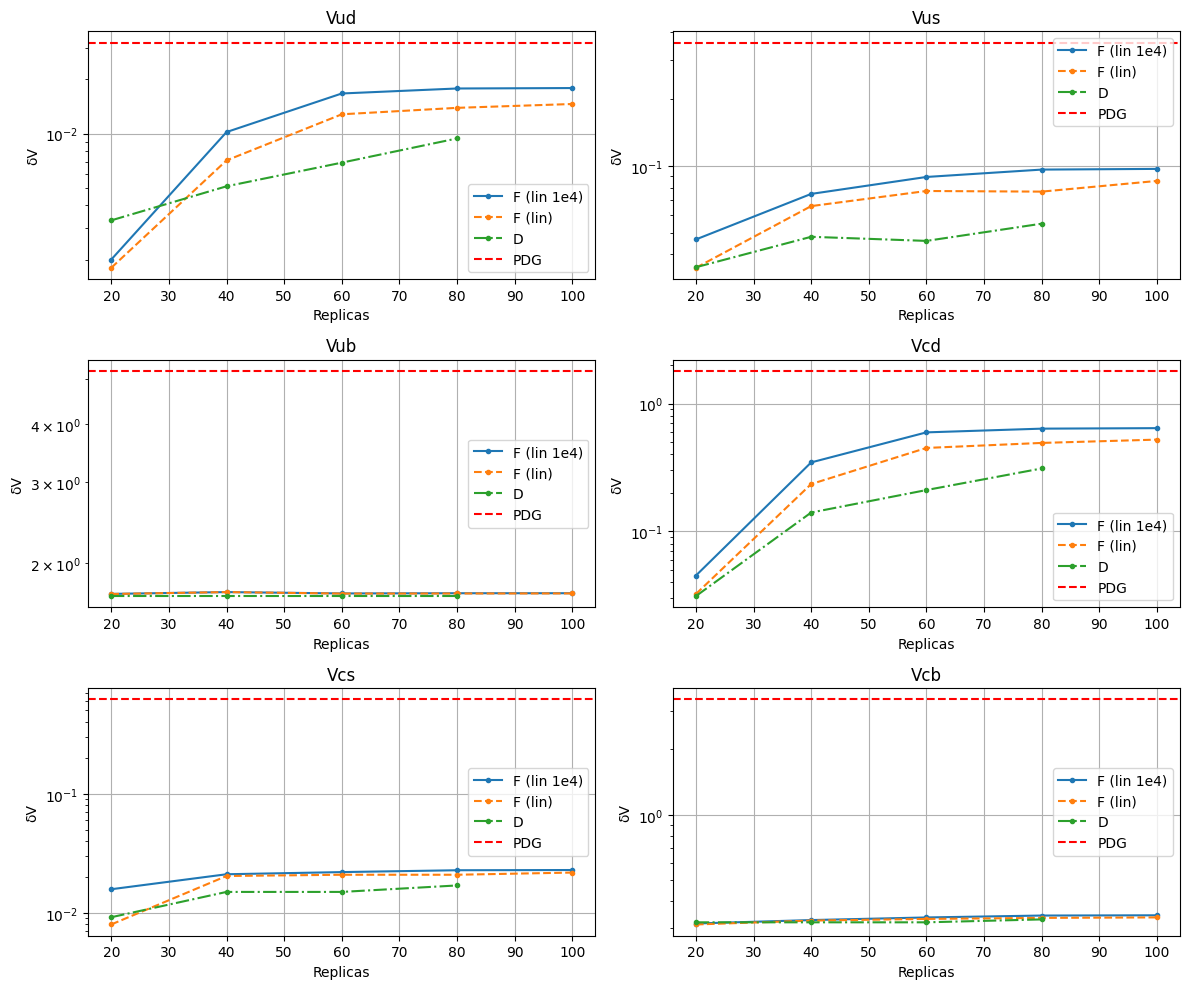

In [80]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()

for i, k in enumerate(["Vud", "Vus", "Vub", "Vcd", "Vcs", "Vcb"]):

    repliche_F_lin = sorted(δV_lin_1e3ev.keys())
    errors_F_lin = [δV_lin_1e3ev[r][k] for r in repliche_F_lin]

    repliche_F_lin_1e4 = sorted(δV_lin_1e4ev.keys())
    errors_F_lin_1e4 = [δV_lin_1e4ev[r][k] for r in repliche_F_lin_1e4]
    
    repliche_D = sorted(δV_David.keys())
    errors_D = [δV_David[r][k] for r in repliche_D]
    axs[i].plot(repliche_F_lin_1e4, errors_F_lin_1e4, marker='.', linestyle='-', label='F (lin 1e4)')
    axs[i].plot(repliche_F_lin, errors_F_lin, marker='.', linestyle='--', label='F (lin)')
    axs[i].plot(repliche_D, errors_D, marker='.', linestyle='-.', label='D')

    axs[i].axhline(δV_PDG[k], color='red', linestyle='--', label='PDG')
    axs[i].set_xlabel("Replicas")
    axs[i].set_ylabel("δV")
    axs[i].set_title(k)
    axs[i].grid(True)
    axs[i].set_yscale('log')
    axs[i].legend()
#axs[5].set_ylim(0.3, 0.35)
plt.tight_layout()
plt.savefig("plot/delta_all.png", dpi=300, bbox_inches='tight')
plt.show()



# Merging binning

In [1463]:
new_xbins = [   0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                11, 12, 13, 14, 15, 16, 17, 18, 
                19, 20, 21, 22, 23, 24, 25, 26, 
                27, 28, 29]

new_ybins = [   0,  5, 6, 7, 8, 
                9, 10, 11, 12, 16, 17, 18, 
                19, 20,]

# If you want to sum, for example, bin 0,1,2 you have to remove the first 3 bins
# If you want to sum bin 4,5,6 the list will be [0,1,2,3,4,7,...] and so on.
# new_xbins = [   0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
#                 11, 12, 13, 14, 15, 16, 17, 18, 
#                 19, 20, 21, 22, 23, 24, 25, 26, 
#                 27, 28, 29]

# new_ybins = [   0, 1, 2, 3, 4, 5, 6, 7, 8, 
#                 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#                 19, 20, 21, 22, 23]



### Load data

In [1464]:
#------------- Libraries -------------#

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from scipy.optimize import minimize, brentq



In [1465]:
#------------ CKM Inputs -------------#

Vud_PDG = 0.97373  
Vus_PDG = 0.2243   
Vub_PDG = 0.00382  
Vcd_PDG = 0.221    
Vcs_PDG = 0.975  
Vcb_PDG = 0.0408   


δUD = 0.00031
δUS = 0.0008
δCD = 0.004
δCS = 0.006
δCB = 1.4e-3
δUB = 0.20e-3

chi2_1dof_68 = 0.988946 

dict_ckm = {
    'ud': 0,
    'us': 1,
    'ub': 2,
    'cd': 3,
    'cs': 4,
    'cb': 5
}


In [1466]:
#------------- Read File -------------#

def readFile(path, n_replicas):
    with open(path, 'r') as file:
        content = np.loadtxt(file, skiprows=4)
        central = content[:, 4]
        replicas = content[:, 5:5 + n_replicas]
    return central, replicas

In [1467]:
#------------- Load Data -------------#

# Loading Charged Current cross sections for Nucleon

folder = folder_charged

n_replicas = n_replicas_PDF 
filename = 'd_N.csv'
σC_d, ΔσC_d = readFile(folder + filename, n_replicas)
filename = 'dbar_N.csv'
σC_db, ΔσC_db = readFile(folder + filename, n_replicas)

filename = 'u_N.csv'
σC_u, ΔσC_u = readFile(folder + filename, n_replicas)
filename = 'ubar_N.csv'
σC_ub, ΔσC_ub = readFile(folder + filename, n_replicas)

filename = 's_p.csv'
σC_s, ΔσC_s = readFile(folder + filename, n_replicas)
filename = 'sbar_p.csv'
σC_sb, ΔσC_sb = readFile(folder + filename, n_replicas)

filename = 'c_p.csv'
σC_c, ΔσC_c = readFile(folder + filename, n_replicas)
filename = 'cbar_p.csv'
σC_cb, ΔσC_cb = readFile(folder + filename, n_replicas)


# Loading Neutral Current cross sections for Nucleon

folder = folder_neutral

filename = 'nunub_b.csv'
σN_b, ΔσN_b = readFile(folder + filename, n_replicas)
filename = 'nunub_bb.csv'
σN_bb, ΔσN_bb = readFile(folder + filename, n_replicas)

filename = 'nunub_c.csv'
σN_c, ΔσN_c = readFile(folder + filename, n_replicas)
filename = 'nunub_cb.csv'
σN_cb, ΔσN_cb = readFile(folder + filename, n_replicas)

filename = 'nunub_d_Nucleon.csv'
σN_d, ΔσN_d = readFile(folder + filename, n_replicas)
filename = 'nunub_db_Nucleon.csv'
σN_db, ΔσN_db = readFile(folder + filename, n_replicas)

filename = 'nunub_u_Nucleon.csv'
σN_u, ΔσN_u = readFile(folder + filename, n_replicas)
filename = 'nunub_ub_Nucleon.csv'
σN_ub, ΔσN_ub = readFile(folder + filename, n_replicas)

filename = 'nunub_s.csv'
σN_s, ΔσN_s = readFile(folder + filename, n_replicas)
filename = 'nunub_sb.csv'
σN_sb, ΔσN_sb = readFile(folder + filename, n_replicas)


# Loading D Fragmentation Functions
n_replicas = 8

folder = 'data/Fit/DFF_Charged/'

filename = 'b_FFs.txt'
DC_b, ΔDC_b = readFile(folder + filename, n_replicas)
filename = 'bbar_FFs.txt'
DC_bb, ΔDC_bb = readFile(folder + filename, n_replicas)

filename = 'c_FFs.txt'
DC_c, ΔDC_c = readFile(folder + filename, n_replicas)
filename = 'cbar_FFs.txt'
DC_cb, ΔDC_cb = readFile(folder + filename, n_replicas)

filename = 'd_FFs.txt'
DC_d, ΔDC_d = readFile(folder + filename, n_replicas)
filename = 'dbar_FFs.txt'
DC_db, ΔDC_db = readFile(folder + filename, n_replicas)

filename = 'u_FFs.txt'
DC_u, ΔDC_u = readFile(folder + filename, n_replicas)
filename = 'ubar_FFs.txt'
DC_ub, ΔDC_ub = readFile(folder + filename, n_replicas)

filename = 's_FFs.txt'
DC_s, ΔDC_s = readFile(folder + filename, n_replicas)
filename = 'sbar_FFs.txt'
DC_sb, ΔDC_sb = readFile(folder + filename, n_replicas)

folder = 'data/Fit/DFF_Neutral/'

filename = 'b_FFs.txt'
DN_b, ΔDN_b = readFile(folder + filename, n_replicas)
filename = 'bbar_FFs.txt'
DN_bb, ΔDN_bb = readFile(folder + filename, n_replicas)

filename = 'c_FFs.txt'
DN_c, ΔDN_c = readFile(folder + filename, n_replicas)
filename = 'cbar_FFs.txt'
DN_cb, ΔDN_cb = readFile(folder + filename, n_replicas)

filename = 'd_FFs.txt'
DN_d, ΔDN_d = readFile(folder + filename, n_replicas)
filename = 'dbar_FFs.txt'
DN_db, ΔDN_db = readFile(folder + filename, n_replicas)

filename = 'u_FFs.txt'
DN_u, ΔDN_u = readFile(folder + filename, n_replicas)
filename = 'ubar_FFs.txt'
DN_ub, ΔDN_ub = readFile(folder + filename, n_replicas)

filename = 's_FFs.txt'
DN_s, ΔDN_s = readFile(folder + filename, n_replicas)
filename = 'sbar_FFs.txt'
DN_sb, ΔDN_sb = readFile(folder + filename, n_replicas)

# Loading B Fragmentation Functions
n_replicas = 8

folder = 'data/Fit/BFF_Charged/'

filename = 'b_BFFs.txt'
BC_b, ΔBC_b = readFile(folder + filename, n_replicas)
filename = 'bbar_BFFs.txt'
BC_bb, ΔBC_bb = readFile(folder + filename, n_replicas)

filename = 'c_BFFs.txt'
BC_c, ΔBC_c = readFile(folder + filename, n_replicas)
filename = 'cbar_BFFs.txt'
BC_cb, ΔBC_cb = readFile(folder + filename, n_replicas)

filename = 'd_BFFs.txt'
BC_d, ΔBC_d = readFile(folder + filename, n_replicas)
filename = 'dbar_BFFs.txt'
BC_db, ΔBC_db = readFile(folder + filename, n_replicas)

filename = 'u_BFFs.txt'
BC_u, ΔBC_u = readFile(folder + filename, n_replicas)
filename = 'ubar_BFFs.txt'
BC_ub, ΔBC_ub = readFile(folder + filename, n_replicas)

filename = 's_BFFs.txt'
BC_s, ΔBC_s = readFile(folder + filename, n_replicas)
filename = 'sbar_BFFs.txt'
BC_sb, ΔBC_sb = readFile(folder + filename, n_replicas)

folder = 'data/Fit/BFF_Neutral/'

filename = 'b_BFFs.txt'
BN_b, ΔBN_b = readFile(folder + filename, n_replicas)
filename = 'bbar_BFFs.txt'
BN_bb, ΔBN_bb = readFile(folder + filename, n_replicas)

filename = 'c_BFFs.txt'
BN_c, ΔBN_c = readFile(folder + filename, n_replicas)
filename = 'cbar_BFFs.txt'
BN_cb, ΔBN_cb = readFile(folder + filename, n_replicas)

filename = 'd_BFFs.txt'
BN_d, ΔBN_d = readFile(folder + filename, n_replicas)
filename = 'dbar_BFFs.txt'
BN_db, ΔBN_db = readFile(folder + filename, n_replicas)

filename = 'u_BFFs.txt'
BN_u, ΔBN_u = readFile(folder + filename, n_replicas)
filename = 'ubar_BFFs.txt'
BN_ub, ΔBN_ub = readFile(folder + filename, n_replicas)

filename = 's_BFFs.txt'
BN_s, ΔBN_s = readFile(folder + filename, n_replicas)
filename = 'sbar_BFFs.txt'
BN_sb, ΔBN_sb = readFile(folder + filename, n_replicas)



### Cleaning Data

In [1468]:
# Reshaping to bins_x, bins_y, bins_E

n_nu_PDF = n_replicas_PDF
n_nu_D = n_replicas_D
n_nu_B = n_replicas_B
bins_x = 30
bins_y = 24
bins_E = 5
σC_d = σC_d.reshape((bins_x, bins_y, bins_E))
σC_db = σC_db.reshape((bins_x, bins_y, bins_E))
σC_u = σC_u.reshape((bins_x, bins_y, bins_E))
σC_ub = σC_ub.reshape((bins_x, bins_y, bins_E))
σC_s = σC_s.reshape((bins_x, bins_y, bins_E))       
σC_sb = σC_sb.reshape((bins_x, bins_y, bins_E))
σC_c = σC_c.reshape((bins_x, bins_y, bins_E))
σC_cb = σC_cb.reshape((bins_x, bins_y, bins_E)) 

σN_b = σN_b.reshape((bins_x, bins_y))
σN_bb = σN_bb.reshape((bins_x, bins_y))
σN_c = σN_c.reshape((bins_x, bins_y))
σN_cb = σN_cb.reshape((bins_x, bins_y))
σN_d = σN_d.reshape((bins_x, bins_y))
σN_db = σN_db.reshape((bins_x, bins_y))
σN_u = σN_u.reshape((bins_x, bins_y)) 
σN_ub = σN_ub.reshape((bins_x, bins_y))
σN_s = σN_s.reshape((bins_x, bins_y))
σN_sb = σN_sb.reshape((bins_x, bins_y))

DC_b = DC_b.reshape((bins_x, bins_y, bins_E))
DC_bb = DC_bb.reshape((bins_x, bins_y, bins_E))
DC_c = DC_c.reshape((bins_x, bins_y, bins_E))
DC_cb = DC_cb.reshape((bins_x, bins_y, bins_E))
DC_d = DC_d.reshape((bins_x, bins_y, bins_E))
DC_db = DC_db.reshape((bins_x, bins_y, bins_E))
DC_u = DC_u.reshape((bins_x, bins_y, bins_E))
DC_ub = DC_ub.reshape((bins_x, bins_y, bins_E))
DC_s = DC_s.reshape((bins_x, bins_y, bins_E))
DC_sb = DC_sb.reshape((bins_x, bins_y, bins_E)) 

BC_b = BC_b.reshape((bins_x, bins_y, bins_E))
BC_bb = BC_bb.reshape((bins_x, bins_y, bins_E))     
BC_c = BC_c.reshape((bins_x, bins_y, bins_E))
BC_cb = BC_cb.reshape((bins_x, bins_y, bins_E))
BC_d = BC_d.reshape((bins_x, bins_y, bins_E))
BC_db = BC_db.reshape((bins_x, bins_y, bins_E))
BC_u = BC_u.reshape((bins_x, bins_y, bins_E))
BC_ub = BC_ub.reshape((bins_x, bins_y, bins_E))
BC_s = BC_s.reshape((bins_x, bins_y, bins_E))
BC_sb = BC_sb.reshape((bins_x, bins_y, bins_E))

ΔσC_d = ΔσC_d.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_db = ΔσC_db.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_u = ΔσC_u.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_ub = ΔσC_ub.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_s = ΔσC_s.reshape((bins_x, bins_y, bins_E, n_nu_PDF))       
ΔσC_sb = ΔσC_sb.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_c = ΔσC_c.reshape((bins_x, bins_y, bins_E, n_nu_PDF))
ΔσC_cb = ΔσC_cb.reshape((bins_x, bins_y, bins_E, n_nu_PDF)) 

ΔσN_b = ΔσN_b.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_bb = ΔσN_bb.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_c = ΔσN_c.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_cb = ΔσN_cb.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_d = ΔσN_d.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_db = ΔσN_db.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_u = ΔσN_u.reshape((bins_x, bins_y, n_nu_PDF)) 
ΔσN_ub = ΔσN_ub.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_s = ΔσN_s.reshape((bins_x, bins_y, n_nu_PDF))
ΔσN_sb = ΔσN_sb.reshape((bins_x, bins_y, n_nu_PDF))

ΔDC_b = ΔDC_b.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_bb = ΔDC_bb.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_c = ΔDC_c.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_cb = ΔDC_cb.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_d = ΔDC_d.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_db = ΔDC_db.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_u = ΔDC_u.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_ub = ΔDC_ub.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_s = ΔDC_s.reshape((bins_x, bins_y, bins_E, n_nu_D))
ΔDC_sb = ΔDC_sb.reshape((bins_x, bins_y, bins_E, n_nu_D))

ΔBC_b = ΔBC_b.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_bb = ΔBC_bb.reshape((bins_x, bins_y, bins_E, n_nu_B))     
ΔBC_c = ΔBC_c.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_cb = ΔBC_cb.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_d = ΔBC_d.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_db = ΔBC_db.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_u = ΔBC_u.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_ub = ΔBC_ub.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_s = ΔBC_s.reshape((bins_x, bins_y, bins_E, n_nu_B))
ΔBC_sb = ΔBC_sb.reshape((bins_x, bins_y, bins_E, n_nu_B))   

In [1469]:
# Cutting bins


σC_d[x_bins_to_cut, :, :] = 0
σC_db[x_bins_to_cut, :, :] = 0
σC_u[x_bins_to_cut, :, :] = 0
σC_ub[x_bins_to_cut, :, :] = 0
σC_s[x_bins_to_cut, :, :] = 0
σC_sb[x_bins_to_cut, :, :] = 0
σC_c[x_bins_to_cut, :, :] = 0
σC_cb[x_bins_to_cut, :, :] = 0  

σN_b[x_bins_to_cut, :] = 0
σN_bb[x_bins_to_cut, :] = 0
σN_c[x_bins_to_cut, :] = 0
σN_cb[x_bins_to_cut, :] = 0
σN_d[x_bins_to_cut, :] = 0
σN_db[x_bins_to_cut, :] = 0
σN_u[x_bins_to_cut, :] = 0
σN_ub[x_bins_to_cut, :] = 0
σN_s[x_bins_to_cut, :] = 0
σN_sb[x_bins_to_cut, :] = 0

σC_d[:, y_bins_to_cut, :] = 0
σC_db[:, y_bins_to_cut, :] = 0
σC_u[:, y_bins_to_cut, :] = 0
σC_ub[:, y_bins_to_cut, :] = 0
σC_s[:, y_bins_to_cut, :] = 0
σC_sb[:, y_bins_to_cut, :] = 0
σC_c[:, y_bins_to_cut, :] = 0
σC_cb[:, y_bins_to_cut, :] = 0      

σN_b[:, y_bins_to_cut] = 0
σN_bb[:, y_bins_to_cut] = 0
σN_c[:, y_bins_to_cut] = 0
σN_cb[:, y_bins_to_cut] = 0
σN_d[:, y_bins_to_cut] = 0
σN_db[:, y_bins_to_cut] = 0 
σN_u[:, y_bins_to_cut] = 0
σN_ub[:, y_bins_to_cut] = 0
σN_s[:, y_bins_to_cut] = 0
σN_sb[:, y_bins_to_cut] = 0


In [1470]:
# Removing cross sections below a certain threshold
threshold = 1/(min_number_of_events*luminosity)

σC_d[σC_d < threshold] = 0
σC_db[σC_db < threshold] = 0
σC_u[σC_u < threshold] = 0
σC_ub[σC_ub < threshold] = 0
σC_s[σC_s < threshold] = 0  
σC_sb[σC_sb < threshold] = 0
σC_c[σC_c < threshold] = 0
σC_cb[σC_cb < threshold] = 0    

σN_b[σN_b < threshold] = 0
σN_bb[σN_bb < threshold] = 0
σN_c[σN_c < threshold] = 0
σN_cb[σN_cb < threshold] = 0
σN_d[σN_d < threshold] = 0
σN_db[σN_db < threshold] = 0
σN_u[σN_u < threshold] = 0
σN_ub[σN_ub < threshold] = 0
σN_s[σN_s < threshold] = 0
σN_sb[σN_sb < threshold] = 0



In [1471]:
# If you want to sum, for example, bin 0,1,2 you have to remove the first 3 bins
# If you want to sum bin 4,5,6 the list will be [0,1,2,3,4,7,...] and so on.
# new_xbins = [   0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
#                 11, 12, 13, 14, 15, 16, 17, 18, 
#                 19, 20, 21, 22, 23, 24, 25, 26, 
#                 27, 28, 29]

# new_ybins = [   0, 1, 2, 3, 4, 5, 6, 7, 8, 
#                 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#                 19, 20, 21, 22, 23]



σC_d = np.add.reduceat(σC_d, new_xbins, axis=0)
σC_d = np.add.reduceat(σC_d, new_ybins, axis=1)
σC_db = np.add.reduceat(σC_db, new_xbins, axis=0)
σC_db = np.add.reduceat(σC_db, new_ybins, axis=1)
σC_u = np.add.reduceat(σC_u, new_xbins, axis=0)
σC_u = np.add.reduceat(σC_u, new_ybins, axis=1)
σC_ub = np.add.reduceat(σC_ub, new_xbins, axis=0)
σC_ub = np.add.reduceat(σC_ub, new_ybins, axis=1)
σC_s = np.add.reduceat(σC_s, new_xbins, axis=0)
σC_s = np.add.reduceat(σC_s, new_ybins, axis=1)
σC_sb = np.add.reduceat(σC_sb, new_xbins, axis=0)
σC_sb = np.add.reduceat(σC_sb, new_ybins, axis=1)
σC_c = np.add.reduceat(σC_c, new_xbins, axis=0)
σC_c = np.add.reduceat(σC_c, new_ybins, axis=1)
σC_cb = np.add.reduceat(σC_cb, new_xbins, axis=0)
σC_cb = np.add.reduceat(σC_cb, new_ybins, axis=1)   

σN_b = np.add.reduceat(σN_b, new_xbins, axis=0)
σN_b = np.add.reduceat(σN_b, new_ybins, axis=1)
σN_bb = np.add.reduceat(σN_bb, new_xbins, axis=0)
σN_bb = np.add.reduceat(σN_bb, new_ybins, axis=1)
σN_c = np.add.reduceat(σN_c, new_xbins, axis=0)
σN_c = np.add.reduceat(σN_c, new_ybins, axis=1)
σN_cb = np.add.reduceat(σN_cb, new_xbins, axis=0)
σN_cb = np.add.reduceat(σN_cb, new_ybins, axis=1)
σN_d = np.add.reduceat(σN_d, new_xbins, axis=0)
σN_d = np.add.reduceat(σN_d, new_ybins, axis=1)
σN_db = np.add.reduceat(σN_db, new_xbins, axis=0)
σN_db = np.add.reduceat(σN_db, new_ybins, axis=1)
σN_u = np.add.reduceat(σN_u, new_xbins, axis=0)
σN_u = np.add.reduceat(σN_u, new_ybins, axis=1) 
σN_ub = np.add.reduceat(σN_ub, new_xbins, axis=0)
σN_ub = np.add.reduceat(σN_ub, new_ybins, axis=1)
σN_s = np.add.reduceat(σN_s, new_xbins, axis=0)
σN_s = np.add.reduceat(σN_s, new_ybins, axis=1)
σN_sb = np.add.reduceat(σN_sb, new_xbins, axis=0)
σN_sb = np.add.reduceat(σN_sb, new_ybins, axis=1)

# Reshaping uncertainties
ΔσC_d = np.add.reduceat(ΔσC_d, new_xbins, axis=0)
ΔσC_d = np.add.reduceat(ΔσC_d, new_ybins, axis=1)
ΔσC_db = np.add.reduceat(ΔσC_db, new_xbins, axis=0)
ΔσC_db = np.add.reduceat(   ΔσC_db, new_ybins, axis=1)
ΔσC_u = np.add.reduceat(ΔσC_u, new_xbins, axis=0)
ΔσC_u = np.add.reduceat(ΔσC_u, new_ybins, axis=1)
ΔσC_ub = np.add.reduceat(ΔσC_ub, new_xbins, axis=0)
ΔσC_ub = np.add.reduceat(ΔσC_ub, new_ybins, axis=1)
ΔσC_s = np.add.reduceat(ΔσC_s, new_xbins, axis=0)
ΔσC_s = np.add.reduceat(ΔσC_s, new_ybins, axis=1)
ΔσC_sb = np.add.reduceat(ΔσC_sb, new_xbins, axis=0)
ΔσC_sb = np.add.reduceat(ΔσC_sb, new_ybins, axis=1)
ΔσC_c = np.add.reduceat(ΔσC_c, new_xbins, axis=0)
ΔσC_c = np.add.reduceat(ΔσC_c, new_ybins, axis=1)
ΔσC_cb = np.add.reduceat(ΔσC_cb, new_xbins, axis=0)
ΔσC_cb = np.add.reduceat(ΔσC_cb, new_ybins, axis=1)

ΔσN_b = np.add.reduceat(ΔσN_b, new_xbins, axis=0)
ΔσN_b = np.add.reduceat(ΔσN_b, new_ybins, axis=1)
ΔσN_bb = np.add.reduceat(ΔσN_bb, new_xbins, axis=0)
ΔσN_bb = np.add.reduceat(ΔσN_bb, new_ybins, axis=1)
ΔσN_c = np.add.reduceat(ΔσN_c, new_xbins, axis=0)
ΔσN_c = np.add.reduceat(ΔσN_c, new_ybins, axis=1)
ΔσN_cb = np.add.reduceat(ΔσN_cb, new_xbins, axis=0)
ΔσN_cb = np.add.reduceat(ΔσN_cb, new_ybins, axis=1)
ΔσN_d = np.add.reduceat(ΔσN_d, new_xbins, axis=0)
ΔσN_d = np.add.reduceat(ΔσN_d, new_ybins, axis=1)
ΔσN_db = np.add.reduceat(ΔσN_db, new_xbins, axis=0)
ΔσN_db = np.add.reduceat(ΔσN_db, new_ybins, axis=1)
ΔσN_u = np.add.reduceat(ΔσN_u, new_xbins, axis=0)
ΔσN_u = np.add.reduceat(ΔσN_u, new_ybins, axis=1) 
ΔσN_ub = np.add.reduceat(ΔσN_ub, new_xbins, axis=0)
ΔσN_ub = np.add.reduceat(ΔσN_ub, new_ybins, axis=1)
ΔσN_s = np.add.reduceat(ΔσN_s, new_xbins, axis=0)
ΔσN_s = np.add.reduceat(ΔσN_s, new_ybins, axis=1)
ΔσN_sb = np.add.reduceat(ΔσN_sb, new_xbins, axis=0)
ΔσN_sb = np.add.reduceat(ΔσN_sb, new_ybins, axis=1)

# Reshaping D Fragmentation Functions
DC_b = np.add.reduceat(DC_b, new_xbins, axis=0)
DC_b = np.add.reduceat(DC_b, new_ybins, axis=1)
DC_bb = np.add.reduceat(DC_bb, new_xbins, axis=0)
DC_bb = np.add.reduceat(DC_bb, new_ybins, axis=1)
DC_c = np.add.reduceat(DC_c, new_xbins, axis=0)
DC_c = np.add.reduceat(DC_c, new_ybins, axis=1)
DC_cb = np.add.reduceat(DC_cb, new_xbins, axis=0)
DC_cb = np.add.reduceat(DC_cb, new_ybins, axis=1)
DC_d = np.add.reduceat(DC_d, new_xbins, axis=0)
DC_d = np.add.reduceat(DC_d, new_ybins, axis=1)
DC_db = np.add.reduceat(DC_db, new_xbins, axis=0)
DC_db = np.add.reduceat(DC_db, new_ybins, axis=1)
DC_u = np.add.reduceat(DC_u, new_xbins, axis=0)
DC_u = np.add.reduceat(DC_u, new_ybins, axis=1)
DC_ub = np.add.reduceat(DC_ub, new_xbins, axis=0)
DC_ub = np.add.reduceat(DC_ub, new_ybins, axis= 1)
DC_s = np.add.reduceat(DC_s, new_xbins, axis=0)
DC_s = np.add.reduceat(DC_s, new_ybins, axis=1)
DC_sb = np.add.reduceat(DC_sb, new_xbins, axis=0)
DC_sb = np.add.reduceat(DC_sb, new_ybins, axis=1)

# Reshaping B Fragmentation Functions
BC_b = np.add.reduceat(BC_b, new_xbins, axis=0)
BC_b = np.add.reduceat(BC_b, new_ybins, axis=1) 
BC_bb = np.add.reduceat(BC_bb, new_xbins, axis=0)
BC_bb = np.add.reduceat(BC_bb, new_ybins, axis=1)
BC_c = np.add.reduceat(BC_c, new_xbins, axis=0)
BC_c = np.add.reduceat(BC_c, new_ybins, axis=1)
BC_cb = np.add.reduceat(BC_cb, new_xbins, axis=0)
BC_cb = np.add.reduceat(BC_cb, new_ybins, axis=1)
BC_d = np.add.reduceat(BC_d, new_xbins, axis=0)
BC_d = np.add.reduceat(BC_d, new_ybins, axis=1)
BC_db = np.add.reduceat(BC_db, new_xbins, axis=0)
BC_db = np.add.reduceat(BC_db, new_ybins, axis=1)
BC_u = np.add.reduceat(BC_u, new_xbins, axis=0)
BC_u = np.add.reduceat(BC_u, new_ybins, axis=1)
BC_ub = np.add.reduceat(BC_ub, new_xbins, axis=0)
BC_ub = np.add.reduceat(BC_ub, new_ybins, axis=1)
BC_s = np.add.reduceat(BC_s, new_xbins, axis=0)
BC_s = np.add.reduceat(BC_s, new_ybins, axis=1)
BC_sb = np.add.reduceat(BC_sb, new_xbins, axis=0)
BC_sb = np.add.reduceat(BC_sb, new_ybins, axis=1)

# Reshaping uncertainties
ΔDC_b = np.add.reduceat(ΔDC_b, new_xbins, axis=0)
ΔDC_b = np.add.reduceat(ΔDC_b, new_ybins, axis=1)
ΔDC_bb = np.add.reduceat(ΔDC_bb, new_xbins, axis=0)
ΔDC_bb = np.add.reduceat(ΔDC_bb, new_ybins, axis=1)
ΔDC_c = np.add.reduceat(ΔDC_c, new_xbins, axis=0)
ΔDC_c = np.add.reduceat(ΔDC_c, new_ybins, axis=1)
ΔDC_cb = np.add.reduceat(ΔDC_cb, new_xbins, axis=0)
ΔDC_cb = np.add.reduceat(ΔDC_cb, new_ybins, axis=1)
ΔDC_d = np.add.reduceat(ΔDC_d, new_xbins, axis=0)
ΔDC_d = np.add.reduceat(ΔDC_d, new_ybins, axis=1)
ΔDC_db = np.add.reduceat(ΔDC_db, new_xbins, axis=0)
ΔDC_db = np.add.reduceat(ΔDC_db, new_ybins, axis=   1)
ΔDC_u = np.add.reduceat(ΔDC_u, new_xbins, axis=0)
ΔDC_u = np.add.reduceat(ΔDC_u, new_ybins, axis=1)
ΔDC_ub = np.add.reduceat(ΔDC_ub, new_xbins, axis=0)
ΔDC_ub = np.add.reduceat(ΔDC_ub, new_ybins, axis=1)
ΔDC_s = np.add.reduceat(ΔDC_s, new_xbins, axis=0)
ΔDC_s = np.add.reduceat(ΔDC_s, new_ybins, axis=1)
ΔDC_sb = np.add.reduceat(ΔDC_sb, new_xbins, axis=0)
ΔDC_sb = np.add.reduceat(ΔDC_sb, new_ybins, axis=1) 

ΔBC_b = np.add.reduceat(ΔBC_b, new_xbins, axis=0)
ΔBC_b = np.add.reduceat(ΔBC_b, new_ybins, axis=1)
ΔBC_bb = np.add.reduceat(ΔBC_bb, new_xbins, axis=0)
ΔBC_bb = np.add.reduceat(ΔBC_bb, new_ybins, axis=1)
ΔBC_c = np.add.reduceat(ΔBC_c, new_xbins, axis=0)
ΔBC_c = np.add.reduceat(ΔBC_c, new_ybins, axis=1)
ΔBC_cb = np.add.reduceat(ΔBC_cb, new_xbins, axis=0)
ΔBC_cb = np.add.reduceat(ΔBC_cb, new_ybins, axis=1)
ΔBC_d = np.add.reduceat(ΔBC_d, new_xbins, axis=0)
ΔBC_d = np.add.reduceat(ΔBC_d, new_ybins, axis=1)   
ΔBC_db = np.add.reduceat(ΔBC_db, new_xbins, axis=0)
ΔBC_db = np.add.reduceat(ΔBC_db, new_ybins, axis=1)
ΔBC_u = np.add.reduceat(ΔBC_u, new_xbins, axis=0)
ΔBC_u = np.add.reduceat(ΔBC_u, new_ybins, axis=1)
ΔBC_ub = np.add.reduceat(ΔBC_ub, new_xbins, axis=0)
ΔBC_ub = np.add.reduceat(ΔBC_ub, new_ybins, axis=1)
ΔBC_s = np.add.reduceat(ΔBC_s, new_xbins, axis=0)
ΔBC_s = np.add.reduceat(ΔBC_s, new_ybins, axis=1)
ΔBC_sb = np.add.reduceat(ΔBC_sb, new_xbins, axis=0)
ΔBC_sb = np.add.reduceat(ΔBC_sb, new_ybins, axis=1)



In [1472]:
print(σC_d.shape)

(30, 14, 5)


In [1473]:
# Observables are to be passed as (Ebins, xbins*ybins) or, if there are 
# replicas, as (Ebins, xbins*ybins, n_replicas) so we reshape them accordingly
bins_x = σC_d.shape[0]
bins_y = σC_d.shape[1]

σC_d = σC_d.reshape((bins_x*bins_y,bins_E ))
σC_d = σC_d.T

σC_db = σC_db.reshape((bins_x*bins_y,bins_E ))
σC_db = σC_db.T

σC_u = σC_u.reshape((bins_x*bins_y,bins_E ))
σC_u = σC_u.T

σC_ub = σC_ub.reshape((bins_x*bins_y,bins_E ))
σC_ub = σC_ub.T

σC_s = σC_s.reshape((bins_x*bins_y,bins_E ))
σC_s = σC_s.T

σC_sb = σC_sb.reshape((bins_x*bins_y,bins_E ))
σC_sb = σC_sb.T

σC_c = σC_c.reshape((bins_x*bins_y,bins_E ))
σC_c = σC_c.T

σC_cb = σC_cb.reshape((bins_x*bins_y,bins_E ))
σC_cb = σC_cb.T

σN_b = σN_b.reshape((bins_x*bins_y))
σN_bb = σN_bb.reshape((bins_x*bins_y))
σN_c = σN_c.reshape((bins_x*bins_y))
σN_cb = σN_cb.reshape((bins_x*bins_y))
σN_d = σN_d.reshape((bins_x*bins_y))
σN_db = σN_db.reshape((bins_x*bins_y))
σN_u = σN_u.reshape((bins_x*bins_y))
σN_ub = σN_ub.reshape((bins_x*bins_y))
σN_s = σN_s.reshape((bins_x*bins_y))
σN_sb = σN_sb.reshape((bins_x*bins_y))  


DC_b = DC_b.reshape((bins_x*bins_y,bins_E ))
DC_b = DC_b.T  

DC_bb = DC_bb.reshape((bins_x*bins_y,bins_E ))
DC_bb = DC_bb.T

DC_c = DC_c.reshape((bins_x*bins_y,bins_E ))
DC_c = DC_c.T

DC_cb = DC_cb.reshape((bins_x*bins_y,bins_E ))  
DC_cb = DC_cb.T

DC_d = DC_d.reshape((bins_x*bins_y,bins_E ))    
DC_d = DC_d.T

DC_db = DC_db.reshape((bins_x*bins_y,bins_E ))
DC_db = DC_db.T

DC_u = DC_u.reshape((bins_x*bins_y,bins_E ))
DC_u = DC_u.T

DC_ub = DC_ub.reshape((bins_x*bins_y,bins_E ))
DC_ub = DC_ub.T

DC_s = DC_s.reshape((bins_x*bins_y,bins_E ))
DC_s = DC_s.T

DC_sb = DC_sb.reshape((bins_x*bins_y,bins_E ))
DC_sb = DC_sb.T

BC_b = BC_b.reshape((bins_x*bins_y,bins_E ))
BC_b = BC_b.T

BC_bb = BC_bb.reshape((bins_x*bins_y,bins_E ))
BC_bb = BC_bb.T

BC_c = BC_c.reshape((bins_x*bins_y,bins_E ))
BC_c = BC_c.T

BC_cb = BC_cb.reshape((bins_x*bins_y,bins_E ))
BC_cb = BC_cb.T

BC_d = BC_d.reshape((bins_x*bins_y,bins_E ))
BC_d = BC_d.T

BC_db = BC_db.reshape((bins_x*bins_y,bins_E ))
BC_db = BC_db.T

BC_u = BC_u.reshape((bins_x*bins_y,bins_E ))
BC_u = BC_u.T

BC_ub = BC_ub.reshape((bins_x*bins_y,bins_E ))
BC_ub = BC_ub.T

BC_s = BC_s.reshape((bins_x*bins_y,bins_E ))
BC_s = BC_s.T

BC_sb = BC_sb.reshape((bins_x*bins_y,bins_E ))
BC_sb = BC_sb.T

ΔσC_d = ΔσC_d.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_d = ΔσC_d.transpose(1, 0, 2)
ΔσC_db = ΔσC_db.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_db = ΔσC_db.transpose(1, 0, 2)
ΔσC_u = ΔσC_u.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_u = ΔσC_u.transpose(1, 0, 2)
ΔσC_ub = ΔσC_ub.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_ub = ΔσC_ub.transpose(1, 0, 2)
ΔσC_s = ΔσC_s.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_s = ΔσC_s.transpose(1, 0, 2)
ΔσC_sb = ΔσC_sb.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_sb = ΔσC_sb.transpose(1, 0, 2)
ΔσC_c = ΔσC_c.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_c = ΔσC_c.transpose(1, 0, 2)
ΔσC_cb = ΔσC_cb.reshape((bins_x*bins_y, bins_E, n_nu_PDF))
ΔσC_cb = ΔσC_cb.transpose(1, 0, 2)

ΔσN_b = ΔσN_b.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_bb = ΔσN_bb.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_c = ΔσN_c.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_cb = ΔσN_cb.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_d = ΔσN_d.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_db = ΔσN_db.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_u = ΔσN_u.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_ub = ΔσN_ub.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_s = ΔσN_s.reshape((bins_x*bins_y, n_nu_PDF))
ΔσN_sb = ΔσN_sb.reshape((bins_x*bins_y, n_nu_PDF))

ΔDC_b = ΔDC_b.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_b = ΔDC_b.transpose(1, 0, 2)
ΔDC_bb = ΔDC_bb.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_bb = ΔDC_bb.transpose(1, 0, 2)
ΔDC_c = ΔDC_c.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_c = ΔDC_c.transpose(1, 0, 2)
ΔDC_cb = ΔDC_cb.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_cb = ΔDC_cb.transpose(1, 0, 2)
ΔDC_d = ΔDC_d.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_d = ΔDC_d.transpose(1, 0, 2)
ΔDC_db = ΔDC_db.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_db = ΔDC_db.transpose(1, 0, 2)
ΔDC_u = ΔDC_u.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_u = ΔDC_u.transpose(1, 0, 2)
ΔDC_ub = ΔDC_ub.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_ub = ΔDC_ub.transpose(1, 0, 2)
ΔDC_s = ΔDC_s.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_s = ΔDC_s.transpose(1, 0, 2)
ΔDC_sb = ΔDC_sb.reshape((bins_x*bins_y, bins_E, n_nu_D))
ΔDC_sb = ΔDC_sb.transpose(1, 0, 2)

ΔBC_b = ΔBC_b.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_b = ΔBC_b.transpose(1, 0, 2)
ΔBC_bb = ΔBC_bb.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_bb = ΔBC_bb.transpose(1, 0, 2)
ΔBC_c = ΔBC_c.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_c = ΔBC_c.transpose(1, 0, 2)
ΔBC_cb = ΔBC_cb.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_cb = ΔBC_cb.transpose(1, 0, 2)
ΔBC_d = ΔBC_d.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_d = ΔBC_d.transpose(1, 0, 2)
ΔBC_db = ΔBC_db.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_db = ΔBC_db.transpose(1, 0, 2)
ΔBC_u = ΔBC_u.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_u = ΔBC_u.transpose(1, 0, 2)
ΔBC_ub = ΔBC_ub.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_ub = ΔBC_ub.transpose(1, 0, 2)
ΔBC_s = ΔBC_s.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_s = ΔBC_s.transpose(1, 0, 2)
ΔBC_sb = ΔBC_sb.reshape((bins_x*bins_y, bins_E, n_nu_B))
ΔBC_sb = ΔBC_sb.transpose(1, 0, 2)


### $\chi^2$ Linearized over CKM and Nuisances

In [1474]:
class Chi2_full_lin:
        def __init__(self,
                                σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                ΔσC_d, ΔσC_db, ΔσC_u, ΔσC_ub, ΔσC_s, ΔσC_sb, ΔσC_c, ΔσC_cb,
                                
                                σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                ΔσN_d, ΔσN_db, ΔσN_u, ΔσN_ub, ΔσN_s, ΔσN_sb, ΔσN_c, ΔσN_cb, ΔσN_b, ΔσN_bb,
                                
                                D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                ΔD_b, ΔD_bb, ΔD_c, ΔD_cb, ΔD_d, ΔD_db, ΔD_s, ΔD_sb, ΔD_u, ΔD_ub,
                                
                                B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub,
                                ΔB_b, ΔB_bb, ΔB_c, ΔB_cb, ΔB_d, ΔB_db, ΔB_s, ΔB_sb, ΔB_u, ΔB_ub,  
                                
                        bins_x,
                        bins_y,
                        bins_E,
                        n_nu_PDF=40,
                        n_nu_D=8,
                        n_nu_B=8,
                        
                        luminosity=1.5e9,
                ):

                self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb = σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb
                self.ΔσC_d, self.ΔσC_db, self.ΔσC_u, self.ΔσC_ub, self.ΔσC_s, self.ΔσC_sb, self.ΔσC_c, self.ΔσC_cb = ΔσC_d, ΔσC_db, ΔσC_u, ΔσC_ub, ΔσC_s, ΔσC_sb, ΔσC_c, ΔσC_cb
                
                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb = σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb
                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb = ΔσN_d, ΔσN_db, ΔσN_u, ΔσN_ub, ΔσN_s, ΔσN_sb, ΔσN_c, ΔσN_cb, ΔσN_b, ΔσN_bb 
                
                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub = D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub
                self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub = ΔD_b, ΔD_bb, ΔD_c, ΔD_cb, ΔD_d, ΔD_db, ΔD_s, ΔD_sb, ΔD_u, ΔD_ub
                
                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub = B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub
                self.ΔB_b, self.ΔB_bb, self.ΔB_c, self.ΔB_cb, self.ΔB_d, self.ΔB_db, self.ΔB_s, self.ΔB_sb, self.ΔB_u, self.ΔB_ub = ΔB_b, ΔB_bb, ΔB_c, ΔB_cb, ΔB_d, ΔB_db, ΔB_s, ΔB_sb, ΔB_u, ΔB_ub
                
                self.bins_x = bins_x
                self.bins_y = bins_y
                self.bins_E = bins_E
                
                self.n_nu_PDF = n_nu_PDF        
                self.n_nu_D = n_nu_D
                self.n_nu_B = n_nu_B
                
                self.lumi = luminosity
                
                
                self.Get_Covariance_Matrix()
        
        def Cross_Section( self,    Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub, which_cross_section):
                
                def σC_ν( Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (ν q -> μ- X) Inclusive Cross section
                        
                        q can be  d, s, ub, cb,
                        """   
                        return  (Vud**2 + Vcd**2) * σC_d + \
                                (Vus**2 + Vcs**2) * σC_s + \
                                (Vud**2 + Vus**2 + Vub**2) * σC_ub + \
                                (Vcd**2 + Vcs**2 + Vcb**2) * σC_cb                      

                def σC_ν_DP(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (ν q -> μ- X D^{*}_{+} ) Semi-Inclusive Cross section with D*,+ meson in the final state
                        
                        q can be  d, s, ub, cb,
                        """
                        arrs = [σC_d, σC_s, σC_ub, σC_cb, D_u, D_c, D_sb, D_db, D_bb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr

                        σC_d, σC_s, σC_ub, σC_cb, D_u, D_c, D_sb, D_db, D_bb = arrs
                        return (σC_d * (Vud**2 * D_u + Vcd**2 * D_c) + 
                                σC_s * (Vus**2 * D_u + Vcs**2 * D_c) + 
                                σC_ub * (Vud**2 * D_db + Vus**2 * D_sb + Vub**2 * D_bb) + 
                                σC_cb * (Vcd**2 * D_db + Vcs**2 * D_sb + Vcb**2 * D_bb))

                def σC_ν_DM(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (ν q -> μ- X D^{*}_{-} ) Semi-Inclusive Cross section with D meson in the final state
                        
                        q can be  d, s, ub, cb,
                        
                        Here I'm using that D-(q) = D+(qbar)
                        """
                        arrs = [σC_d, σC_s, σC_ub, σC_cb, D_d, D_s, D_ub, D_b, D_cb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σC_d, σC_s, σC_ub, σC_cb, D_d, D_s, D_ub, D_b, D_cb = arrs
                        
                        return  σC_d * (Vud**2 * D_ub + Vcd**2 * D_cb) + \
                                σC_s * (Vus**2 * D_ub + Vcs**2 * D_cb) + \
                                σC_ub * (Vud**2 * D_d + Vus**2 * D_s + Vub**2 * D_b) + \
                                σC_cb * (Vcd**2 * D_d + Vcs**2 * D_s + Vcb**2 * D_b)
                
                def σC_ν_B( Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (ν q -> μ- X B ) Semi-Inclusive Cross section with B hadron in the final state
                        
                        q can be  d, s, ub, cb,
                        """

                        arrs = [σC_d, σC_s, σC_ub, σC_cb, B_u, B_c, B_sb, B_db, B_bb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σC_d, σC_s, σC_ub, σC_cb, B_u, B_c, B_sb, B_db, B_bb = arrs  
                        
                        return  σC_d * (Vud**2 * B_u + Vcd**2 * B_c) + \
                                σC_s * (Vus**2 * B_u + Vcs**2 * B_c) + \
                                σC_ub * (Vud**2 * B_db + Vus**2 * B_sb + Vub**2 * B_bb) + \
                                σC_cb * (Vcd**2 * B_db + Vcs**2 * B_sb + Vcb**2 * B_bb)

        #----------------------------------------- νb q -> e+ X -----------------------------------#
                def σC_νbar(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (νbar q -> e+ X) Inclusive Cross section
                        
                        q can be  db, sb, u, c,
                        """
                        return (Vud**2 + Vcd**2) * σC_db + \
                                (Vus**2 + Vcs**2) * σC_sb + \
                                (Vud**2 + Vus**2 + Vub**2) * σC_u + \
                                (Vcd**2 + Vcs**2 + Vcb**2) * σC_c
                
                def σC_νbar_DP(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (νbar q -> e+ X D*,+ ) Semi-Inclusive Cross section with D*,+ meson in the final state
                        
                        q can be  db, sb, u, c,
                        """
                        
                        arrs = [σC_db, σC_sb, σC_u, σC_c, D_ub, D_cb, D_s, D_d, D_b]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σC_db, σC_sb, σC_u, σC_c, D_ub, D_cb, D_s, D_d, D_b = arrs
                        
                        return  σC_db * (Vud**2 * D_ub + Vcd**2 * D_cb) + \
                                σC_sb * (Vus**2 * D_ub + Vcs**2 * D_cb) + \
                                σC_u * (Vud**2 * D_d + Vus**2 * D_s + Vub**2 * D_b) + \
                                σC_c * (Vcd**2 * D_d + Vcs**2 * D_s + Vcb**2 * D_b)
                
                def σC_νbar_DM(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (νbar q -> e+ X D*,- ) Semi-Inclusive Cross section with D meson in the final state
                        
                        q can be  db, sb, u, c,
                        
                        Here I'm using that D-(q) = D+(qbar)
                        """
                        arrs = [σC_db, σC_sb, σC_u, σC_c, D_bb, D_c, D_db, D_u, D_sb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σC_db, σC_sb, σC_u, σC_c, D_bb, D_c, D_db, D_u, D_sb = arrs
                        
                        return  σC_db * (Vud**2 * D_u + Vcd**2 * D_c) + \
                                σC_sb * (Vus**2 * D_u + Vcs**2 * D_c) + \
                                σC_u * (Vud**2 * D_db + Vus**2 * D_sb + Vub**2 * D_bb) + \
                                σC_c * (Vcd**2 * D_db + Vcs**2 * D_sb + Vcb**2 * D_bb)
                
                def σC_νbar_B(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        """
                        Computes the (νbar q -> e+ X B ) Semi-Inclusive Cross section with B hadron in the final state
                        
                        q can be  db, sb, u, c,
                        """
                        arrs = [σC_db, σC_sb, σC_u, σC_c, B_ub, B_cb, B_s, B_d, B_b]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σC_db, σC_sb, σC_u, σC_c, B_ub, B_cb, B_s, B_d, B_b = arrs
                        return  σC_db * (Vud**2 * B_ub + Vcd**2 * B_cb) + \
                                σC_sb * (Vus**2 * B_ub + Vcs**2 * B_cb) + \
                                σC_u * (Vud**2 * B_d + Vus**2 * B_s + Vub**2 * B_b) + \
                                σC_c * (Vcd**2 * B_d + Vcs**2 * B_s + Vcb**2 * B_b)

        #--------------------------------------- ν(b) q -> ν(b) X ---------------------------------#
        ## NB: I'm including the b quark in the cross section, so 5 Flavour scheme for NC.
                def σN(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):
                        return σN_d + σN_db + σN_u + σN_ub + σN_s + σN_sb + σN_c + σN_cb + σN_b + σN_bb

                def σN_DP(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):

                        arrs = [σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, D_d, D_db, D_u, D_ub, D_s, D_sb, D_c, D_cb, D_b, D_bb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, D_d, D_db, D_u, D_ub, D_s, D_sb, D_c, D_cb, D_b, D_bb= arrs
                        return  σN_d * D_d + σN_db * D_db + \
                                σN_u * D_u + σN_ub * D_ub + \
                                σN_s * D_s + σN_sb * D_sb + \
                                σN_c * D_c + σN_cb * D_cb + \
                                σN_b * D_b + σN_bb * D_bb
                
                def σN_DM(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):

                        arrs = [σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, D_d, D_db, D_u, D_ub, D_s, D_sb, D_c, D_cb, D_b, D_bb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, D_d, D_db, D_u, D_ub, D_s, D_sb, D_c, D_cb, D_b, D_bb= arrs
                        return  σN_d * D_db + σN_db * D_d + \
                                σN_u * D_ub + σN_ub * D_u + \
                                σN_s * D_sb + σN_sb * D_s + \
                                σN_c * D_cb + σN_cb * D_c + \
                                σN_b * D_bb + σN_bb * D_b

                def σN_B(  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub):

                        arrs = [σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, B_d, B_db, B_u, B_ub, B_s, B_sb, B_c, B_cb, B_b, B_bb]
                        arrs = [np.atleast_2d(arr) for arr in arrs]
                        for i, arr in enumerate(arrs):
                                arr = np.atleast_2d(arr)
                                if arr.shape[0] == 1:
                                        arr = arr.T
                                arrs[i] = arr
                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb, B_d, B_db, B_u, B_ub, B_s, B_sb, B_c, B_cb, B_b, B_bb = arrs
                        return  σN_d * B_d + σN_db * B_db + \
                                σN_u * B_u + σN_ub * B_ub + \
                                σN_s * B_s + σN_sb * B_sb + \
                                σN_c * B_c + σN_cb * B_cb + \
                                σN_b * B_b + σN_bb * B_bb
        #-------------------------------------------------------------------------------------------#

                xsec_dict = {
                        "σC_ν": σC_ν,
                        "σC_ν_DP": σC_ν_DP,
                        "σC_ν_DM": σC_ν_DM,
                        "σC_ν_B": σC_ν_B,
                        "σC_νbar": σC_νbar,
                        "σC_νbar_DP": σC_νbar_DP,
                        "σC_νbar_DM": σC_νbar_DM,
                        "σC_νbar_B": σC_νbar_B,
                        "σN": σN,
                        "σN_DP": σN_DP,
                        "σN_DM": σN_DM,
                        "σN_B": σN_B,
                        }
                
                return xsec_dict[which_cross_section](  Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                                        σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                                                        σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                                                        D_b, D_bb, D_c, D_cb, D_d, D_db, D_s, D_sb, D_u, D_ub,
                                                        B_b, B_bb, B_c, B_cb, B_d, B_db, B_s, B_sb, B_u, B_ub)

        def Get_Cross_Section(self, Vud, Vus, Vub, Vcd, Vcs, Vcb):
                # Compute the cross sections
                σC_ν_Inc = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_ν_DP = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_ν_DM = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_ν_B  = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                
                σC_νbar_Inc = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_νbar_DP = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_νbar_DM = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                σC_νbar_B  = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                
                σN_Inc = np.zeros((self.bins_x * self.bins_y))
                σN_DP = np.zeros((self.bins_x * self.bins_y))
                σN_DM = np.zeros((self.bins_x * self.bins_y))
                σN_B  = np.zeros((self.bins_x * self.bins_y))

                # Compute the variations wrt to PDF
                ΔσC_ν_Inc = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_ν_DP = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_ν_DM = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_ν_B  = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                
                ΔσC_νbar_Inc = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_νbar_DP = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_νbar_DM = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                ΔσC_νbar_B  = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔσC_u[0][0])))
                
                ΔσN_Inc = np.zeros((self.bins_x * self.bins_y, len(self.ΔσN_u[0])))
                ΔσN_DP = np.zeros((self.bins_x * self.bins_y, len(self.ΔσN_u[0])))
                ΔσN_DM = np.zeros((self.bins_x * self.bins_y, len(self.ΔσN_u[0])))
                ΔσN_B  = np.zeros((self.bins_x * self.bins_y, len(self.ΔσN_u[0])))
                
                # Compute the variations wrt to the D - B FFs
                ΔDP_ν = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔDM_ν = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔB_ν = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔB_d[0])))
                
                ΔDP_νbar = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔDM_νbar = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔB_νbar = np.zeros((self.bins_E, self.bins_x * self.bins_y, len(self.ΔB_d[0])))
                
                ΔDP_N = np.zeros((self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔDM_N = np.zeros((self.bins_x * self.bins_y, len(self.ΔD_d[0])))
                ΔB_N = np.zeros((self.bins_x * self.bins_y, len(self.ΔB_d[0])))
                

                
                for i in range(self.bins_E):
                        σC_ν_Inc[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν")
                        σC_ν_DP[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DP").flatten()
                        σC_ν_DM[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DM").flatten()
                        σC_ν_B[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_B").flatten()
                        
                        σC_νbar_Inc[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar")
                        σC_νbar_DP[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DP").flatten()
                        σC_νbar_DM[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DM").flatten()
                        σC_νbar_B[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_B").flatten()
                        
                        ΔσC_ν_Inc[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν")
                        ΔσC_ν_DP[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DP")
                        ΔσC_ν_DM[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DM")
                        ΔσC_ν_B[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_B")
                        
                        ΔσC_νbar_Inc[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar")
                        ΔσC_νbar_DP[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DP")
                        ΔσC_νbar_DM[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DM")
                        ΔσC_νbar_B[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.ΔσC_d[i], self.ΔσC_db[i], self.ΔσC_u[i], self.ΔσC_ub[i], self.ΔσC_s[i], self.ΔσC_sb[i], self.ΔσC_c[i], self.ΔσC_cb[i],
                                self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_B")
                        
                        ΔDP_ν[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DP")
                        ΔDM_ν[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_ν_DM")
                        ΔB_ν[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.ΔB_b, self.ΔB_bb, self.ΔB_c, self.ΔB_cb, self.ΔB_d, self.ΔB_db, self.ΔB_s, self.ΔB_sb, self.ΔB_u, self.ΔB_ub,
                                "σC_ν_B")
                        
                        ΔDP_νbar[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DP")
                        ΔDM_νbar[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                                self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                                "σC_νbar_DM")
                        ΔB_νbar[i] = self.Cross_Section(
                                Vud, Vus, Vub, Vcd, Vcs, Vcb,
                                self.σC_d[i], self.σC_db[i], self.σC_u[i], self.σC_ub[i], self.σC_s[i], self.σC_sb[i], self.σC_c[i], self.σC_cb[i],
                                self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                                self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                                self.ΔB_b, self.ΔB_bb, self.ΔB_c, self.ΔB_cb, self.ΔB_d, self.ΔB_db, self.ΔB_s, self.ΔB_sb, self.ΔB_u, self.ΔB_ub,
                                "σC_νbar_B")
                                                
                        
                σN_Inc = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN")
                σN_DP = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DP").flatten()
                σN_DM = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DM").flatten()
                σN_B = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_B").flatten()
                
                ΔσN_Inc = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.ΔσC_d, self.ΔσC_db, self.ΔσC_u, self.ΔσC_ub, self.ΔσC_s, self.ΔσC_sb, self.ΔσC_c, self.ΔσC_cb,
                        self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN")
                ΔσN_DP = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.ΔσC_d, self.ΔσC_db, self.ΔσC_u, self.ΔσC_ub, self.ΔσC_s, self.ΔσC_sb, self.ΔσC_c, self.ΔσC_cb,
                        self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DP")
                ΔσN_DM = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.ΔσC_d, self.ΔσC_db, self.ΔσC_u, self.ΔσC_ub, self.ΔσC_s, self.ΔσC_sb, self.ΔσC_c, self.ΔσC_cb,
                        self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DM")
                ΔσN_B = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.ΔσC_d, self.ΔσC_db, self.ΔσC_u, self.ΔσC_ub, self.ΔσC_s, self.ΔσC_sb, self.ΔσC_c, self.ΔσC_cb,
                        self.ΔσN_d, self.ΔσN_db, self.ΔσN_u, self.ΔσN_ub, self.ΔσN_s, self.ΔσN_sb, self.ΔσN_c, self.ΔσN_cb, self.ΔσN_b, self.ΔσN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_B")
                
                ΔDP_N = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DP")
                ΔDM_N = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.ΔD_b, self.ΔD_bb, self.ΔD_c, self.ΔD_cb, self.ΔD_d, self.ΔD_db, self.ΔD_s, self.ΔD_sb, self.ΔD_u, self.ΔD_ub,
                        self.B_b, self.B_bb, self.B_c, self.B_cb, self.B_d, self.B_db, self.B_s, self.B_sb, self.B_u, self.B_ub,
                        "σN_DM")
                ΔB_N = self.Cross_Section(
                        Vud, Vus, Vub, Vcd, Vcs, Vcb,
                        self.σC_d, self.σC_db, self.σC_u, self.σC_ub, self.σC_s, self.σC_sb, self.σC_c, self.σC_cb,
                        self.σN_d, self.σN_db, self.σN_u, self.σN_ub, self.σN_s, self.σN_sb, self.σN_c, self.σN_cb, self.σN_b, self.σN_bb,
                        self.D_b, self.D_bb, self.D_c, self.D_cb, self.D_d, self.D_db, self.D_s, self.D_sb, self.D_u, self.D_ub,
                        self.ΔB_b, self.ΔB_bb, self.ΔB_c, self.ΔB_cb, self.ΔB_d, self.ΔB_db, self.ΔB_s, self.ΔB_sb, self.ΔB_u, self.ΔB_ub,
                        "σN_B")

                return  σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, \
                        σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                        ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, \
                        ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, \
                        ΔDP_ν, ΔDM_ν, ΔB_ν, \
                        ΔDP_νbar, ΔDM_νbar, ΔB_νbar, \
                        σN_Inc, σN_DP, σN_DM, σN_B, \
                        ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, \
                        ΔDP_N, ΔDM_N, ΔB_N
        
        def Get_Statistical_Covariance(self, N1, N2, N3, N4, N5, N6, N7, N8, N9, N10, N11, N12, id_to_remove):
                
                NDPmu1, NDPmu2, NDPmu3, NDPmu4, NDPmu5 = N1
                NDMmu1, NDMmu2, NDMmu3, NDMmu4, NDMmu5 = N2
                NBmu1, NBmu2, NBmu3, NBmu4, NBmu5 = N3
                NImu1, NImu2, NImu3, NImu4, NImu5 = N4
                                        
                NDPe1, NDPe2, NDPe3, NDPe4, NDPe5 = N5
                NDMe1, NDMe2, NDMe3, NDMe4, NDMe5 = N6
                NBe1, NBe2, NBe3, NBe4, NBe5 = N7
                NIe1, NIe2, NIe3, NIe4, NIe5 = N8
                                        
                NDPn = N9
                NDMn = N10
                NBn = N11 
                NIn = N12

                S = np.array([
                        [(NDPmu1*(-NDPmu1 + NImu1))/NImu1**3, 0, 0, 0, 0, -((NDMmu1*NDPmu1)/NImu1**3), 0, 0, 0, 0, -((NBmu1*NDPmu1)/NImu1**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, (NDPmu2*(-NDPmu2 + NImu2))/NImu2**3, 0, 0, 0, 0, -((NDMmu2*NDPmu2)/NImu2**3), 0, 0, 0, 0, -((NBmu2*NDPmu2)/NImu2**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, (NDPmu3*(-NDPmu3 + NImu3))/NImu3**3, 0, 0, 0, 0, -((NDMmu3*NDPmu3)/NImu3**3), 0, 0, 0, 0, -((NBmu3*NDPmu3)/NImu3**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, (NDPmu4*(-NDPmu4 + NImu4))/NImu4**3, 0, 0, 0, 0, -((NDMmu4*NDPmu4)/NImu4**3), 0, 0, 0, 0, -((NBmu4*NDPmu4)/NImu4**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, (NDPmu5*(-NDPmu5 + NImu5))/NImu5**3, 0, 0, 0, 0, -((NDMmu5*NDPmu5)/NImu5**3), 0, 0, 0, 0, -((NBmu5*NDPmu5)/NImu5**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [-((NDMmu1*NDPmu1)/NImu1**3), 0, 0, 0, 0, (NDMmu1*(-NDMmu1 + NImu1))/NImu1**3, 0, 0, 0, 0, -((NBmu1*NDMmu1)/NImu1**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, -((NDMmu2*NDPmu2)/NImu2**3), 0, 0, 0, 0, (NDMmu2*(-NDMmu2 + NImu2))/NImu2**3, 0, 0, 0, 0, -((NBmu2*NDMmu2)/NImu2**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, -((NDMmu3*NDPmu3)/NImu3**3), 0, 0, 0, 0, (NDMmu3*(-NDMmu3 + NImu3))/NImu3**3, 0, 0, 0, 0, -((NBmu3*NDMmu3)/NImu3**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, -((NDMmu4*NDPmu4)/NImu4**3), 0, 0, 0, 0, (NDMmu4*(-NDMmu4 + NImu4))/NImu4**3, 0, 0, 0, 0, -((NBmu4*NDMmu4)/NImu4**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, -((NDMmu5*NDPmu5)/NImu5**3), 0, 0, 0, 0, (NDMmu5*(-NDMmu5 + NImu5))/NImu5**3, 0, 0, 0, 0, -((NBmu5*NDMmu5)/NImu5**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [-((NBmu1*NDPmu1)/NImu1**3), 0, 0, 0, 0, -((NBmu1*NDMmu1)/NImu1**3), 0, 0, 0, 0, (NBmu1*(-NBmu1 + NImu1))/NImu1**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, -((NBmu2*NDPmu2)/NImu2**3), 0, 0, 0, 0, -((NBmu2*NDMmu2)/NImu2**3), 0, 0, 0, 0, (NBmu2*(-NBmu2 + NImu2))/NImu2**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, -((NBmu3*NDPmu3)/NImu3**3), 0, 0, 0, 0, -((NBmu3*NDMmu3)/NImu3**3), 0, 0, 0, 0, (NBmu3*(-NBmu3 + NImu3))/NImu3**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, -((NBmu4*NDPmu4)/NImu4**3), 0, 0, 0, 0, -((NBmu4*NDMmu4)/NImu4**3), 0, 0, 0, 0, (NBmu4*(-NBmu4 + NImu4))/NImu4**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, -((NBmu5*NDPmu5)/NImu5**3), 0, 0, 0, 0, -((NBmu5*NDMmu5)/NImu5**3), 0, 0, 0, 0, (NBmu5*(-NBmu5 + NImu5))/NImu5**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPe1*(-NDPe1 + NIe1))/NIe1**3, 0, 0, 0, 0, -((NDMe1*NDPe1)/NIe1**3), 0, 0, 0, 0, -((NBe1*NDPe1)/NIe1**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPe2*(-NDPe2 + NIe2))/NIe2**3, 0, 0, 0, 0, -((NDMe2*NDPe2)/NIe2**3), 0, 0, 0, 0, -((NBe2*NDPe2)/NIe2**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPe3*(-NDPe3 + NIe3))/NIe3**3, 0, 0, 0, 0, -((NDMe3*NDPe3)/NIe3**3), 0, 0, 0, 0, -((NBe3*NDPe3)/NIe3**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPe4*(-NDPe4 + NIe4))/NIe4**3, 0, 0, 0, 0, -((NDMe4*NDPe4)/NIe4**3), 0, 0, 0, 0, -((NBe4*NDPe4)/NIe4**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPe5*(-NDPe5 + NIe5))/NIe5**3, 0, 0, 0, 0, -((NDMe5*NDPe5)/NIe5**3), 0, 0, 0, 0, -((NBe5*NDPe5)/NIe5**3), 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMe1*NDPe1)/NIe1**3), 0, 0, 0, 0, (NDMe1*(-NDMe1 + NIe1))/NIe1**3, 0, 0, 0, 0, -((NBe1*NDMe1)/NIe1**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMe2*NDPe2)/NIe2**3), 0, 0, 0, 0, (NDMe2*(-NDMe2 + NIe2))/NIe2**3, 0, 0, 0, 0, -((NBe2*NDMe2)/NIe2**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMe3*NDPe3)/NIe3**3), 0, 0, 0, 0, (NDMe3*(-NDMe3 + NIe3))/NIe3**3, 0, 0, 0, 0, -((NBe3*NDMe3)/NIe3**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMe4*NDPe4)/NIe4**3), 0, 0, 0, 0, (NDMe4*(-NDMe4 + NIe4))/NIe4**3, 0, 0, 0, 0, -((NBe4*NDMe4)/NIe4**3), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMe5*NDPe5)/NIe5**3), 0, 0, 0, 0, (NDMe5*(-NDMe5 + NIe5))/NIe5**3, 0, 0, 0, 0, -((NBe5*NDMe5)/NIe5**3), 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBe1*NDPe1)/NIe1**3), 0, 0, 0, 0, -((NBe1*NDMe1)/NIe1**3), 0, 0, 0, 0, (NBe1*(-NBe1 + NIe1))/NIe1**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBe2*NDPe2)/NIe2**3), 0, 0, 0, 0, -((NBe2*NDMe2)/NIe2**3), 0, 0, 0, 0, (NBe2*(-NBe2 + NIe2))/NIe2**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBe3*NDPe3)/NIe3**3), 0, 0, 0, 0, -((NBe3*NDMe3)/NIe3**3), 0, 0, 0, 0, (NBe3*(-NBe3 + NIe3))/NIe3**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBe4*NDPe4)/NIe4**3), 0, 0, 0, 0, -((NBe4*NDMe4)/NIe4**3), 0, 0, 0, 0, (NBe4*(-NBe4 + NIe4))/NIe4**3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBe5*NDPe5)/NIe5**3), 0, 0, 0, 0, -((NBe5*NDMe5)/NIe5**3), 0, 0, 0, 0, (NBe5*(-NBe5 + NIe5))/NIe5**3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NImu1*(NIe1 + NImu1))/NIe1**3, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NImu2*(NIe2 + NImu2))/NIe2**3, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NImu3*(NIe3 + NImu3))/NIe3**3, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NImu4*(NIe4 + NImu4))/NIe4**3, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NImu5*(NIe5 + NImu5))/NIe5**3, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (NDPn*(-NDPn + NIn))/NIn**3, -((NDMn*NDPn)/NIn**3), -((NBn*NDPn)/NIn**3), 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NDMn*NDPn)/NIn**3), (NDMn*(-NDMn + NIn))/NIn**3, -((NBn*NDMn)/NIn**3), 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -((NBn*NDPn)/NIn**3), -((NBn*NDMn)/NIn**3), (NBn*(-NBn + NIn))/NIn**3, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ((NIe1 + NIe2 + NIe3 + NIe4 + NIe5 + NImu1 + NImu2 + NImu3 + NImu4 + NImu5)*(NIe1 + NIe2 + NIe3 + NIe4 + NIe5 + NImu1 + NImu2 + NImu3 + NImu4 + NImu5 + NIn))/NIn**3]
                ])
                S = np.delete(S, id_to_remove, axis=0)  
                S = np.delete(S, id_to_remove, axis=1)  

                if np.any(np.isnan(S)):
                        print("nan ",self.counter)
                if np.any(np.isinf(S)):
                        print("inf ",self.counter)
                
                return S
        
        def Get_Correlation_Matrix(self, bin, O1, O2, O3, O4, O5, O6, O7, O8, O9, O10, O11,
                                        σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                                        ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, 
                                        ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, 
                                        σN_Inc, σN_DP, σN_DM, σN_B, 
                                        ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, 
                                        ΔDP_N, ΔDM_N, ΔB_N,id_to_remove):

                δM_PDF = []
                #OBS 1
                for i in range(self.bins_E):
                        line_PDF = [
                                O1[i] * (ΔσC_ν_DP[i, bin, j] / σC_ν_DP[i, bin] - ΔσC_ν_Inc[i, bin, j] / σC_ν_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                O1[i] * (ΔDP_ν[i, bin, j] / σC_ν_DP[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                0
                                for j in range(self.n_nu_B)
                        ]

                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)

                #OBS 2
                for i in range(self.bins_E):
                        line_PDF = [
                                O2[i] * (ΔσC_ν_DM[i, bin, j] / σC_ν_DM[i, bin] - ΔσC_ν_Inc[i, bin, j] / σC_ν_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                O2[i] * (ΔDM_ν[i, bin, j] / σC_ν_DM[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                0
                                for j in range(self.n_nu_B)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 3
                for i in range(self.bins_E):
                        line_PDF = [
                                O3[i] * (ΔσC_ν_B[i, bin, j] / σC_ν_B[i, bin] - ΔσC_ν_Inc[i, bin, j] / σC_ν_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                0
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                O3[i] * (ΔB_ν[i, bin, j] / σC_ν_B[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 4
                for i in range(self.bins_E):
                        line_PDF = [
                                O4[i] * (ΔσC_νbar_DP[i, bin, j] / σC_νbar_DP[i, bin] - ΔσC_νbar_Inc[i, bin, j] / σC_νbar_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                O4[i] * (ΔDP_νbar[i, bin, j] / σC_νbar_DP[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                0
                                for j in range(self.n_nu_B)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 5
                for i in range(self.bins_E):
                        line_PDF = [
                                O5[i] * (ΔσC_νbar_DM[i, bin, j] / σC_νbar_DM[i, bin] - ΔσC_νbar_Inc[i, bin, j] / σC_νbar_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                O5[i] * (ΔDM_νbar[i, bin, j] / σC_νbar_DM[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                0
                                for j in range(self.n_nu_B)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 6
                for i in range(self.bins_E):
                        line_PDF = [
                                O6[i] * (ΔσC_νbar_B[i, bin, j] / σC_νbar_B[i, bin] - ΔσC_νbar_Inc[i, bin, j] / σC_νbar_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                0
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                O6[i] * (ΔB_νbar[i, bin, j] / σC_νbar_B[i, bin])
                                for j in range(self.n_nu_D)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 7
                for i in range(self.bins_E):
                        line_PDF = [
                                O7[i] * (ΔσC_ν_Inc[i, bin, j] / σC_ν_Inc[i, bin] - ΔσC_νbar_Inc[i, bin, j] / σC_νbar_Inc[i, bin])
                                for j in range(self.n_nu_PDF)
                        ]
                        
                        line_D = [
                                0
                                for j in range(self.n_nu_D)
                        ]
                        
                        line_B = [
                                0
                                for j in range(self.n_nu_B)
                        ]
                        
                        line = line_PDF + line_D + line_B
                        δM_PDF.append(line)
                
                #OBS 8
                line_PDF = [ 
                        O8 * (ΔσN_DP[bin, j] / σN_DP[bin] - ΔσN_Inc[bin, j] / σN_Inc[bin]) 
                        for j in range(self.n_nu_PDF)
                ]
                line_D = [ 
                        O8 * (ΔDP_N[bin, j] / σN_DP[bin]) 
                        for j in range(self.n_nu_D)
                ]
                line_B = [ 
                        0 
                        for j in range(self.n_nu_B)
                ]
                line = line_PDF + line_D + line_B
                δM_PDF.append(line)
                
                # OBS 9 
                line_PDF = [
                        O9 * (ΔσN_DM[bin, j] / σN_DM[bin] - ΔσN_Inc[bin, j] / σN_Inc[bin])
                        for j in range(self.n_nu_PDF)
                ]
                line_D = [
                        O9 * (ΔDM_N[bin, j] / σN_DM[bin])
                        for j in range(self.n_nu_D)
                ]
                line_B = [
                        0
                        for j in range(self.n_nu_B)
                ]
                line = line_PDF + line_D + line_B
                δM_PDF.append(line)
                
                # OBS 10
                line_PDF = [
                        O10 * (ΔσN_B[bin, j] / σN_B[bin] - ΔσN_Inc[bin, j] / σN_Inc[bin])
                        for j in range(self.n_nu_PDF)
                ]
                line_D = [
                        0
                        for j in range(self.n_nu_D)
                ]
                line_B = [
                        O10 * (ΔB_N[bin, j] / σN_B[bin])
                        for j in range(self.n_nu_D)
                ]
                line = line_PDF + line_D + line_B
                δM_PDF.append(line)
                
                # OBS 11
                line_PDF = [
                        O11 * (np.sum(ΔσC_ν_Inc[:, bin, j] + ΔσC_νbar_Inc[:, bin, j], axis=0) / 
                                np.sum(σC_ν_Inc[:, bin] + σC_νbar_Inc[:, bin], axis=0) - ΔσN_Inc[bin, j] / σN_Inc[bin])
                        for j in range(self.n_nu_PDF)
                ] 
                line_D = [
                        0
                        for j in range(self.n_nu_D)
                ]
                line_B = [
                        0
                        for j in range(self.n_nu_B)
                ]
                line = line_PDF + line_D + line_B
                δM_PDF.append(line)
                
                δM_PDF = [[val.item() if isinstance(val, np.ndarray) else val for val in row] for row in δM_PDF]
                δM_PDF = np.array(δM_PDF)
                δM_PDF = np.delete(δM_PDF, id_to_remove, axis=0)  # elimina righe

                return δM_PDF
        
        def Get_Correlation_Matrix_CKM(self, bin, O1, O2, O3, O4, O5, O6, O7, O8, O9, O10, O11,
                                        σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                                        ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, 
                                        ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, 
                                        σN_Inc, σN_DP, σN_DM, σN_B, 
                                        ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, 
                                        ΔDP_N, ΔDM_N, ΔB_N,id_to_remove):

                δM_PDF = []
                #OBS 1
                for i in range(self.bins_E):
                        line_ud = [
                            2 * Vud_PDG**2 *  ( ( self.σC_d[i,bin] * self.D_u[bin] + self.σC_ub[i,bin] * self.D_db[bin]) * σC_ν_Inc[i,bin] - ( self.σC_d[i,bin] + self.σC_ub[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_us = [
                            2 * Vus_PDG**2 * ( ( self.σC_s[i,bin] * self.D_u[bin] + self.σC_ub[i,bin] * self.D_sb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_ub[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_ub = [
                            2 * Vub_PDG**2 * ( ( self.σC_ub[i,bin] * self.D_bb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_ub[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cd = [
                            2 * Vcd_PDG**2 * ( ( self.σC_d[i,bin] * self.D_c[bin] + self.σC_cb[i,bin] * self.D_db[bin]) * σC_ν_Inc[i,bin] - ( self.σC_d[i,bin] + self.σC_cb[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cs = [
                            2 * Vcs_PDG**2 * ( ( self.σC_s[i,bin] * self.D_c[bin] + self.σC_cb[i,bin] * self.D_sb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_cb[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cb = [
                            2 * Vcb_PDG**2 * ( (                                    self.σC_cb[i,bin] * self.D_bb[bin]) * σC_ν_Inc[i,bin] - (                    self.σC_cb[i,bin])* σC_ν_DP[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)

                # OBS 2
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_d[i,bin] * self.D_ub[bin] + self.σC_ub[i,bin] * self.D_d[bin]) * σC_ν_Inc[i,bin]- ( self.σC_d[i,bin] + self.σC_ub[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_s[i,bin] * self.D_ub[bin] + self.σC_ub[i,bin] * self.D_s[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_ub[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                                     self.σC_ub[i,bin] * self.D_b[bin]) * σC_ν_Inc[i,bin] - (                    self.σC_ub[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_d[i,bin] * self.D_cb[bin] + self.σC_cb[i,bin] * self.D_d[bin]) * σC_ν_Inc[i,bin] - ( self.σC_d[i,bin] + self.σC_cb[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_s[i,bin] * self.D_cb[bin] + self.σC_cb[i,bin] * self.D_s[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_cb[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cb = [
                                2 * Vcb_PDG**2 * ( (                                     self.σC_cb[i,bin] * self.D_b[bin]) * σC_ν_Inc[i,bin] - (                    self.σC_cb[i,bin])* σC_ν_DM[i,bin]) / σC_ν_Inc[i,bin]**2
                        ]
                
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                
                # OBS 3
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_d[i,bin] * self.B_u[bin] + self.σC_ub[i,bin] * self.B_db[bin]) * σC_ν_Inc[i,bin] - ( self.σC_d[i,bin] + self.σC_ub[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_s[i,bin] * self.B_u[bin] + self.σC_ub[i,bin] * self.B_sb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_ub[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                                    self.σC_ub[i,bin] * self.B_bb[bin]) * σC_ν_Inc[i,bin] - (                    self.σC_ub[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_d[i,bin] * self.B_c[bin] + self.σC_cb[i,bin] * self.B_db[bin]) * σC_ν_Inc[i,bin] - ( self.σC_d[i,bin] + self.σC_cb[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_s[i,bin] * self.B_c[bin] + self.σC_cb[i,bin] * self.B_sb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_s[i,bin] + self.σC_cb[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                        line_cb = [
                                2 * Vcb_PDG**2 * ( ( self.σC_cb[i,bin] * self.B_bb[bin]) * σC_ν_Inc[i,bin] - ( self.σC_cb[i,bin])* σC_ν_B[i,bin] ) / σC_ν_Inc[i,bin]**2
                        ]
                
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                        
                # OBS 4
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_db[i, bin] * self.D_ub[bin] + self.σC_u[i, bin] * self.D_d[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_db[i, bin] + self.σC_u[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_sb[i, bin] * self.D_ub[bin] + self.σC_u[i, bin] * self.D_s[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_sb[i, bin] + self.σC_u[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                                       self.σC_u[i, bin] * self.D_b[bin]) * σC_νbar_Inc[i,bin] - (                     self.σC_u[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_db[i, bin] * self.D_cb[bin] + self.σC_c[i, bin] * self.D_d[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_db[i, bin] + self.σC_c[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_sb[i, bin] * self.D_cb[bin] + self.σC_c[i, bin] * self.D_s[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_sb[i, bin] + self.σC_c[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        line_cb = [
                                2 * Vcb_PDG**2 * ( (                                       self.σC_c[i, bin] * self.D_b[bin]) * σC_νbar_Inc[i,bin] - (                     self.σC_c[i, bin])* σC_νbar_DP[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                        
                # OBS 5
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_db[i, bin] * self.D_u[bin] + self.σC_u[i, bin] * self.D_db[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_db[i, bin] + self.σC_u[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_sb[i, bin] * self.D_u[bin] + self.σC_u[i, bin] * self.D_sb[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_sb[i, bin] + self.σC_u[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                                       self.σC_u[i, bin] * self.D_bb[bin]) * σC_νbar_Inc[i,bin] - (                     self.σC_u[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_db[i, bin] * self.D_c[bin] + self.σC_c[i, bin] * self.D_db[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_db[i, bin] + self.σC_c[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_sb[i, bin] * self.D_c[bin] + self.σC_c[i, bin] * self.D_sb[bin]) * σC_νbar_Inc[i,bin] - ( self.σC_sb[i, bin] + self.σC_c[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                        
                        line_cb = [
                                2 * Vcb_PDG**2 * ( (                                       self.σC_c[i, bin] * self.D_bb[bin]) * σC_νbar_Inc[i,bin] - (                     self.σC_c[i, bin])* σC_νbar_DM[i,bin]) / σC_νbar_Inc[i,bin]**2
                        ]
                
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                
                # OBS 6
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_db[i, bin] * self.B_ub[bin] + self.σC_u[i, bin] * self.B_d[bin]) * σC_νbar_Inc[i, bin] - ( self.σC_db[i, bin] + self.σC_u[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_sb[i, bin] * self.B_ub[bin] + self.σC_u[i, bin] * self.B_s[bin]) * σC_νbar_Inc[i, bin] - ( self.σC_sb[i, bin] + self.σC_u[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                                       self.σC_u[i, bin] * self.B_b[bin]) * σC_νbar_Inc[i, bin] - (                      self.σC_u[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_db[i, bin] * self.B_cb[bin] + self.σC_c[i, bin] * self.B_d[bin]) * σC_νbar_Inc [i, bin]- ( self.σC_db[i, bin] + self.σC_c[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_sb[i, bin] * self.B_cb[bin] + self.σC_c[i, bin] * self.B_s[bin]) * σC_νbar_Inc[i, bin] - ( self.σC_sb[i, bin] + self.σC_c[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line_cb = [
                                2 * Vcb_PDG**2 * ( (                                       self.σC_c[i, bin] * self.B_b[bin]) * σC_νbar_Inc [i, bin]- (                      self.σC_c[i, bin])* σC_νbar_B[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                
                # OBS 7
                for i in range(self.bins_E):
                        line_ud = [
                                2 * Vud_PDG**2 * ( ( self.σC_d[i, bin] + self.σC_ub[i, bin] ) * σC_νbar_Inc[i, bin] - (self.σC_db[i, bin] + self.σC_u[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        line_us = [
                                2 * Vus_PDG**2 * ( ( self.σC_s[i, bin] + self.σC_ub[i, bin] ) * σC_νbar_Inc[i, bin] - (self.σC_sb[i, bin] + self.σC_u[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        line_ub = [
                                2 * Vub_PDG**2 * ( (                     self.σC_ub[i, bin] ) * σC_νbar_Inc[i, bin] - (                     self.σC_u[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        line_cd = [
                                2 * Vcd_PDG**2 * ( ( self.σC_d[i, bin] + self.σC_cb[i, bin] ) * σC_νbar_Inc[i, bin] - (self.σC_db[i, bin] + self.σC_c[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        line_cs = [
                                2 * Vcs_PDG**2 * ( ( self.σC_s[i, bin] + self.σC_cb[i, bin] ) * σC_νbar_Inc[i, bin] - (self.σC_sb[i, bin] + self.σC_c[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        line_cb = [
                                2 * Vcb_PDG**2 * ( (                     self.σC_cb[i, bin] ) * σC_νbar_Inc[i, bin] - (                     self.σC_c[i, bin]) * σC_ν_Inc[i, bin]) / σC_νbar_Inc[i, bin]**2
                        ]
                        
                        line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                        δM_PDF.append(line)
                

                # OBS 8
                line_ud = [ 0 ]
                line_us = [ 0 ]
                line_ub = [ 0 ]
                line_cd = [ 0 ]
                line_cs = [ 0 ]
                line_cb = [ 0 ]
                
                line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                δM_PDF.append(line)

                # OBS 9
                line_ud = [ 0 ]
                line_us = [ 0 ]
                line_ub = [ 0 ]
                line_cd = [ 0 ]
                line_cs = [ 0 ]
                line_cb = [ 0 ]
                
                line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                δM_PDF.append(line)
                
                # OBS 10
                line_ud = [ 0 ]
                line_us = [ 0 ] 
                line_ub = [ 0 ]
                line_cd = [ 0 ]
                line_cs = [ 0 ]
                line_cb = [ 0 ]
                
                line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb

                δM_PDF.append(line)
                
                # OBS 11
                line_ud = [
                        2 * Vud_PDG**2 * ( np.sum(self.σC_d[:,bin] + self.σC_ub[:,bin] + self.σC_db[:,bin] + self.σC_u[:,bin], axis=0) ) / σN_Inc[bin] 
                ]
                line_us = [
                        2 * Vus_PDG**2 * ( np.sum(self.σC_s[:,bin] + self.σC_ub[:,bin] + self.σC_sb[:,bin] + self.σC_u[:,bin], axis=0) ) / σN_Inc[bin]
                ]
                line_ub = [
                        2 * Vub_PDG**2 * ( np.sum(                   self.σC_ub[:,bin]+                      self.σC_u[:,bin], axis=0) ) / σN_Inc[bin]
                ]
                line_cd = [
                        2 * Vcd_PDG**2 * ( np.sum(self.σC_d[:,bin] + self.σC_cb[:,bin] + self.σC_db[:,bin] + self.σC_c[:,bin], axis=0) ) / σN_Inc[bin]
                ]
                line_cs = [
                        2 * Vcs_PDG**2 * ( np.sum(self.σC_s[:,bin] + self.σC_cb[:,bin] + self.σC_sb[:,bin] + self.σC_c[:,bin], axis=0) ) / σN_Inc[bin]
                ]
                line_cb = [
                        2 * Vcb_PDG**2 * ( np.sum(                   self.σC_cb[:,bin] +                     self.σC_c[:,bin], axis=0) ) / σN_Inc[bin]
                ]
                
                
                
                line = line_ud + line_us + line_ub + line_cd + line_cs + line_cb
                
                δM_PDF.append(line)
                
                δM_PDF = [[val.item() if isinstance(val, np.ndarray) else val for val in row] for row in δM_PDF]
                δM_PDF = np.array(δM_PDF)
                δM_PDF = np.delete(δM_PDF, id_to_remove, axis=0)  # elimina righe

                return δM_PDF

        def Get_Covariance_Matrix(self,):
                print("start")
                σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, \
                ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, \
                σN_Inc, σN_DP, σN_DM, σN_B, \
                ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, \
                ΔDP_N, ΔDM_N, ΔB_N = self.Get_Cross_Section(Vud_PDG, Vus_PDG, Vub_PDG, Vcd_PDG, Vcs_PDG, Vcb_PDG)
                print("got xsec")
                O1 = np.zeros((self.bins_E))
                O2 = np.zeros((self.bins_E))
                O3 = np.zeros((self.bins_E))
                O4 = np.zeros((self.bins_E))
                O5 = np.zeros((self.bins_E))
                O6 = np.zeros((self.bins_E))
                O7 = np.zeros((self.bins_E))
                
                O = []
                Σ_stat_blocks = []
                δM_blocks = []
                δM_CKM_blocks = []
                self.counter = 0
                for i in range(self.bins_x*self.bins_y):
                        
                        N1 = self.lumi * σC_ν_DP[:,i]
                        N2 = self.lumi * σC_ν_DM[:,i]
                        N3 = self.lumi * σC_ν_B[:,i]
                        N4 = self.lumi * σC_ν_Inc[:,i]
                        
                        N5 = self.lumi * σC_νbar_DP[:,i]
                        N6 = self.lumi * σC_νbar_DM[:,i]
                        N7 = self.lumi * σC_νbar_B[:,i]
                        N8 = self.lumi * σC_νbar_Inc[:,i]
                        
                        N9 = self.lumi * σN_DP[i]
                        N10 = self.lumi * σN_DM[i]
                        N11 = self.lumi * σN_B[i]
                        N12 = self.lumi * σN_Inc[i]
                        
                        O1 = N1 / N4
                        O2 = N2 / N4
                        O3 = N3 / N4
                        O4 = N5 / N8
                        O5 = N6 / N8
                        O6 = N7 / N8
                        O7 = N4 / N8
                        O8 = np.array([N9 / N12])
                        O9 = np.array([N10 / N12])
                        O10 = np.array([ N11 / N12])
                        O11 = np.array([(np.sum(N4 + N8,axis=0)) / N12])
                        
                        Ob = np.concatenate((O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,O11))
                        nan_positions = np.where(np.isnan(Ob))
                        inf_positions = np.where(np.isinf(Ob))
                        zero_positions = np.where(Ob == 0)
                        index_to_remove = np.concatenate((nan_positions[0], zero_positions[0], inf_positions[0]))
                        Ob = np.delete(Ob, index_to_remove, axis=0)
                        O.append(Ob)
                        S = self.Get_Statistical_Covariance(N1, N2, N3, N4, N5, N6, N7, N8, N9, N10, N11, N12,index_to_remove)
                        Σ_stat_blocks.append(S)
                        self.counter+=1
                        δM = self.Get_Correlation_Matrix( i, O1, O2, O3, O4, O5, O6, O7, O8, O9, O10, O11,
                                        σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                                        ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, 
                                        ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, 
                                        σN_Inc, σN_DP, σN_DM, σN_B, 
                                        ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, 
                                        ΔDP_N, ΔDM_N, ΔB_N, index_to_remove )
                        δM_blocks.append(δM)
                        
                        δM = self.Get_Correlation_Matrix_CKM(i, O1, O2, O3, O4, O5, O6, O7, O8, O9, O10, O11,
                                        σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                                        ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, 
                                        ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, 
                                        σN_Inc, σN_DP, σN_DM, σN_B, 
                                        ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, 
                                        ΔDP_N, ΔDM_N, ΔB_N, index_to_remove)
                        δM_CKM_blocks.append(δM)
                
                
                
                Observed = np.concatenate(O, axis=0)
                self.O0 = Observed
                print("got obs, shape ", Observed.shape)
                # Inverting the single blocks is faster than inverting the full block-diag matrix
                Σ_stat_inv_blocks = [np.linalg.inv(B) for B in Σ_stat_blocks]
                Σ_M = block_diag(*Σ_stat_blocks)
                self.Σ_stat = Σ_M
                Σ_M_inv = block_diag(*Σ_stat_inv_blocks)
                
                #Σ_M_inv = np.linalg.inv(Σ_M)
                print("got SigmaM, shape ",Σ_M.shape )
                print("NaN?", np.any(np.isnan(Σ_M)))
                print("Inf?", np.any(np.isinf(Σ_M)))
                
                δM = np.vstack(δM_blocks) 
                self.δM = δM
                print("got deltaM Nuisances, shape ", δM.shape)
                Σ_V = δM @ δM.T
                print("got sigmaV, shape ", Σ_V.shape)
                
                δM_CKM = np.vstack(δM_CKM_blocks)
                self.δM_CKM = δM_CKM
                print(f"got deltaM CKM, shape : {(δM_CKM.shape)}")
                
                print("got  SigmaM INV")
                A = Σ_M_inv @ δM
                print("got  A")
                middle = np.linalg.inv(np.eye(δM.shape[1]) + δM.T @ A)
                Σ_Tot = Σ_M + Σ_V
                self.Inv_Σ_Tot = Σ_M_inv - A @ middle @ A.T 
                print(f"got Σ_Tot and Inv_Σ_Tot, shapes={Σ_Tot.shape, self.Inv_Σ_Tot.shape}")
                
                # import pandas as pd
                # display(pd.DataFrame(Σ_M))
                # display(pd.DataFrame(Σ_M_inv))
                # display(pd.DataFrame(δM))
                # display(pd.DataFrame(Σ_V))
                # display(pd.DataFrame(A))
                # display(pd.DataFrame(middle))
                # display(pd.DataFrame(self.Inv_Σ_Tot))
                # print("Observed shape is ", (Observed).shape)
                # print("Σ_M shape is ", Σ_M.shape)
                # print("δM shape is ", δM.shape)
                # print("Σ_V shape is ", Σ_V.shape)
                # I_approx = Σ_Tot @ self.Inv_Σ_Tot
                # print("is identity? ",np.allclose(Σ_Tot @ self.Inv_Σ_Tot, np.eye(Σ_Tot.shape[0]), atol=1e-8))

        def Get_Predictions(self, Vud, Vus, Vub, Vcd, Vcs, Vcb):
                σC_ν_Inc, σC_ν_DP, σC_ν_DM, σC_ν_B, σC_νbar_Inc, σC_νbar_DP, σC_νbar_DM, σC_νbar_B, \
                ΔσC_ν_Inc, ΔσC_ν_DP, ΔσC_ν_DM, ΔσC_ν_B, ΔσC_νbar_Inc, ΔσC_νbar_DP, ΔσC_νbar_DM, ΔσC_νbar_B, \
                ΔDP_ν, ΔDM_ν, ΔB_ν, ΔDP_νbar, ΔDM_νbar, ΔB_νbar, \
                σN_Inc, σN_DP, σN_DM, σN_B, \
                ΔσN_Inc, ΔσN_DP, ΔσN_DM, ΔσN_B, \
                ΔDP_N, ΔDM_N, ΔB_N = self.Get_Cross_Section(Vud, Vus, Vub, Vcd, Vcs, Vcb)
                
                M1 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M2 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M3 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M4 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M5 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M6 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                M7 = np.zeros((self.bins_E, self.bins_x * self.bins_y))
                
                M = []
                
                for i in range(self.bins_x*self.bins_y):
                        N1 = self.lumi * σC_ν_DP[:,i]
                        N2 = self.lumi * σC_ν_DM[:,i]
                        N3 = self.lumi * σC_ν_B[:,i]
                        N4 = self.lumi * σC_ν_Inc[:,i]
                        
                        N5 = self.lumi * σC_νbar_DP[:,i]
                        N6 = self.lumi * σC_νbar_DM[:,i]
                        N7 = self.lumi * σC_νbar_B[:,i]
                        N8 = self.lumi * σC_νbar_Inc[:,i]
                        
                        N9 = self.lumi * σN_DP[i]
                        N10 = self.lumi * σN_DM[i]
                        N11 = self.lumi * σN_B[i]
                        N12 = self.lumi * σN_Inc[i]
                        
                        M1 = N1 / N4
                        M2 = N2 / N4
                        M3 = N3 / N4
                        M4 = N5 / N8
                        M5 = N6 / N8
                        M6 = N7 / N8
                        M7 = N4 / N8
                        M8 = np.array([N9 / N12])
                        M9 = np.array([N10 / N12])
                        M10 = np.array([ N11 / N12])
                        M11 = np.array([(np.sum(N4 + N8,axis=0)) / N12])
                        
                        Mb = np.concatenate((M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11))
                        
                        nan_positions = np.where(np.isnan(Mb))
                        zero_positions = np.where(Mb == 0)
                        inf_positions = np.where(np.isinf(Mb))
                        index_to_remove = np.concatenate((nan_positions[0], zero_positions[0], inf_positions[0]))
                        Mb = np.delete(Mb, index_to_remove, axis=0)
                        M.append(Mb)
                Prediction = np.concatenate(M, axis=0)
                return Prediction
        
        def __call__(self, Vud, Vus, Vub, Vcd, Vcs, Vcb):
                M0 = self.Get_Predictions(Vud, Vus, Vub, Vcd, Vcs, Vcb)
                
                chi2 = (M0-self.O0).T @ self.Inv_Σ_Tot @ (M0-self.O0) 
                import pandas as pd
                df = pd.concat([
                        pd.DataFrame(self.O0, columns=["O0"]),
                        pd.DataFrame(M0, columns=["M0"]),
                        pd.DataFrame(M0 - self.O0, columns=["M0 - O0"])
                ], axis=1)

                display(df.head(10))

                display(pd.DataFrame(self.δM_CKM, columns = ["δud", "δus", "δub", "δcd", "δcs", "δcb" ]).head(10))
                # display(pd.DataFrame(self.O0))
                return chi2

In [1475]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

CHI_lin = Chi2_full_lin(   
                    σC_d, σC_db, σC_u, σC_ub, σC_s, σC_sb, σC_c, σC_cb,
                    ΔσC_d, ΔσC_db, ΔσC_u, ΔσC_ub, ΔσC_s, ΔσC_sb, ΔσC_c, ΔσC_cb,

                    σN_d, σN_db, σN_u, σN_ub, σN_s, σN_sb, σN_c, σN_cb, σN_b, σN_bb,
                    ΔσN_d, ΔσN_db, ΔσN_u, ΔσN_ub, ΔσN_s, ΔσN_sb, ΔσN_c, ΔσN_cb, ΔσN_b, ΔσN_bb,

                    DC_b[0], DC_bb[0], DC_c[0], DC_cb[0], DC_d[0], DC_db[0], DC_s[0], DC_sb[0], DC_u[0], DC_ub[0],
                    ΔDC_b[0], ΔDC_bb[0], ΔDC_c[0], ΔDC_cb[0], ΔDC_d[0], ΔDC_db[0], ΔDC_s[0], ΔDC_sb[0], ΔDC_u[0], ΔDC_ub[0],
                    
                    BC_b[0], BC_bb[0], BC_c[0], BC_cb[0], BC_d[0], BC_db[0], BC_s[0], BC_sb[0], BC_u[0], BC_ub[0],
                    ΔBC_b[0], ΔBC_bb[0], ΔBC_c[0], ΔBC_cb[0], ΔBC_d[0], ΔBC_db[0], ΔBC_s[0], ΔBC_sb[0], ΔBC_u[0], ΔBC_ub[0],  
                    
                    bins_x,
                    bins_y, 
                    bins_E, 
                    
                    n_nu_PDF,
                    n_nu_D,
                    n_nu_B,
                    
                    
                    
                    luminosity=1.5e9,
)


start
got xsec
got obs, shape  (4855,)
got SigmaM, shape  (4855, 4855)
NaN? False
Inf? False
got deltaM Nuisances, shape  (4855, 56)
got sigmaV, shape  (4855, 4855)
got deltaM CKM, shape : (4855, 6)
got  SigmaM INV
got  A
got Σ_Tot and Inv_Σ_Tot, shapes=((4855, 4855), (4855, 4855))


In [1476]:
stat_covariance = CHI_lin.Σ_stat

var_nuisances = CHI_lin.δM
var_ckm = CHI_lin.δM_CKM

var_nuisances.shape, var_ckm.shape, stat_covariance.shape
var = np.concatenate((var_ckm, var_nuisances), axis=1)
stat_cov_inv = np.linalg.inv(stat_covariance)
M = var.T @ stat_cov_inv @ var 
M.shape
M_pdg = np.diag([Vud_PDG**2/δUD**2, Vus_PDG**2/δUS**2, Vub_PDG**2/δUB**2, Vcd_PDG**2/δCD**2, Vcs_PDG**2/δCS**2, Vcb_PDG**2/δCB**2])

for i in range(6):
    M[i,i] += M_pdg[i,i]  # Aggiungo alla diagonale  le incertezze PDG
for i in range(n_nu_PDF):
    M[6+i,6+i] += 1  # Aggiungo alla diagonale le incertezze PDF
for i in range(n_nu_D):
    M[6+n_nu_PDF+i,6+n_nu_PDF+i] += 1  # Aggiungo alla diagonale le incertezze D
for i in range(n_nu_B):
    M[6+n_nu_PDF+n_nu_D+i,6+n_nu_PDF+n_nu_D+i] += 1  # Aggiungo alla diagonale le incertezze B

Minv = np.linalg.inv(M)

### Results

<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
/var/folders/j3/35chk69569z8llqry75sy88m0000gp/T/ipykernel_7357/1411499371.py:17: SyntaxWarning: invalid escape sequence '\l'
  row_labels = ["Vud", "Vcb",r"$\lambda_1$", f"$\lambda{n_nu_PDF}$", r"$\lambda D_{8}$", r"$\lambda B_8$"]
/var/folders/j3/35chk69569z8llqry75sy88m0000gp/T/ipykernel_7357/1411499371.py:21: SyntaxWarning: invalid escape sequence '\l'
  col_labels = ["Vud", "Vcb",r"$\lambda_1$", f"$\lambda{n_nu_PDF}$", r"$\lambda D_{8}$", r"$\lambda B_8$"]


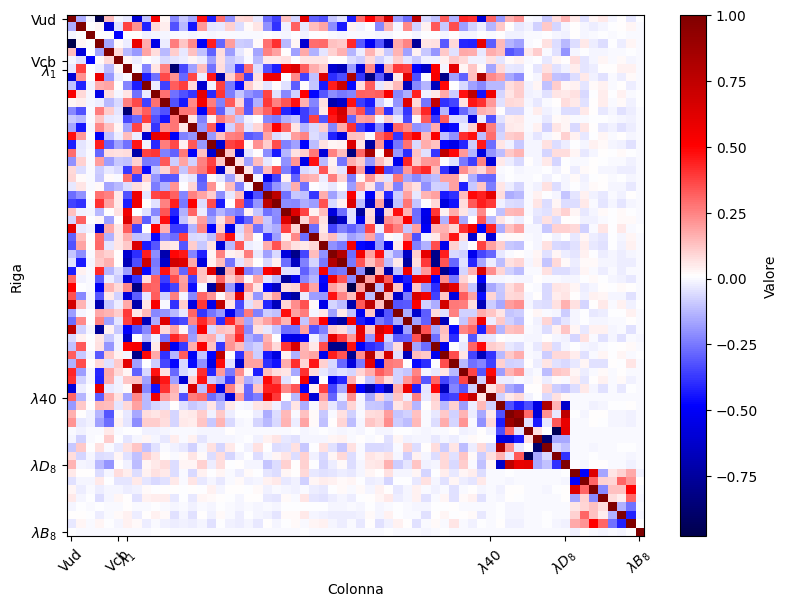

In [1477]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Matrice di esempio 60x60
correlation_matrix = Minv / (np.sqrt(np.diag(Minv))[:, None] * np.sqrt(np.diag(Minv))[None, :])
 

plt.figure(figsize=(8, 6))
#plt.imshow(abs(matrix), cmap='viridis', norm=LogNorm(), aspect='auto')
plt.imshow((correlation_matrix), cmap='seismic', aspect='auto')

plt.colorbar(label='Valore')
plt.xlabel("Colonna")
plt.ylabel("Riga")
plt.tight_layout()
row_ticks = [0, 5, 6, 6+n_nu_PDF-1 , 6+n_nu_PDF+n_nu_D-1, 6+n_nu_PDF+n_nu_D+n_nu_B-1]
row_labels = ["Vud", "Vcb",r"$\lambda_1$", f"$\lambda{n_nu_PDF}$", r"$\lambda D_{8}$", r"$\lambda B_8$"]

# Ed etichettare pure le colonne 0, 15, 30, 45, 59
col_ticks = [0, 5, 6, 6+n_nu_PDF-1 , 6+n_nu_PDF+n_nu_D-1, 6+n_nu_PDF+n_nu_D+n_nu_B-1]
col_labels = ["Vud", "Vcb",r"$\lambda_1$", f"$\lambda{n_nu_PDF}$", r"$\lambda D_{8}$", r"$\lambda B_8$"]

plt.yticks(row_ticks, row_labels)
plt.xticks(col_ticks, col_labels, rotation=45)
plt.show()


In [1478]:
# Printing Results
keys = ["Vud", "Vus", "Vub", "Vcd", "Vcs", "Vcb"]
index = n_replicas_PDF  # valore scelto da te

k = [np.sqrt(Minv[i,i])*chi2_1dof_68 * 100 for i in range(6)]

d = {keys[i]: round(k[i], 4) for i in range(6)}  # arrotondo a 4 decimali

print(f"{index}: " + "{" + ", ".join(f'"{key}": {value}' for key, value in d.items()) + "},")


40: {"Vud": 0.0086, "Vus": 0.0732, "Vub": 1.4368, "Vcd": 0.2877, "Vcs": 0.0208, "Vcb": 0.3108},


In [1479]:
# Used binning:
# new_xbins = [   0,]

# new_ybins = [       0, 1, 2, 3, 4, 5, 6, 7, 8, 
#                     9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#                     19, 20, 21, 22, 23]
δV_lin_1e4ev_1_24_5 = {
    20: {"Vud": 0.0018, "Vus": 0.0441, "Vub": 0.4382, "Vcd": 0.0095, "Vcs": 0.0148, "Vcb": 0.0737},
    40: {"Vud": 0.0093, "Vus": 0.353, "Vub": 0.4422, "Vcd": 0.2552, "Vcs": 0.0535, "Vcb": 0.0831},
    60: {"Vud": 0.0088, "Vus": 0.1708, "Vub": 0.4407, "Vcd": 0.2863, "Vcs": 0.0273, "Vcb": 0.118},
    80: {"Vud": 0.0109, "Vus": 0.3061, "Vub": 0.4416, "Vcd": 0.3362, "Vcs": 0.0433, "Vcb": 0.1459},
    100: {"Vud": 0.0119, "Vus": 0.3117, "Vub": 0.4416, "Vcd": 0.3718, "Vcs": 0.0448, "Vcb": 0.1191},
    
}

# Used binning:
# new_xbins = [   0, 5, 6, 7, 8, 9, 10, 
#                 11, 12, 17, 18, 
#                 19, 20, 21,]

# new_ybins = [   0, 1, 2, 3, 4, 5, 6, 7, 8, 
#                 9, 10, 11, 17, 18, 
#                 19, 20, 21, 22, 23]

δV_lin_1e4ev_14_19_5 = {
    20: {"Vud": 0.0017, "Vus": 0.0433, "Vub": 0.4831, "Vcd": 0.0202, "Vcs": 0.0106, "Vcb": 0.1629},
    40: {"Vud": 0.0033, "Vus": 0.0658, "Vub": 0.4893, "Vcd": 0.0971, "Vcs": 0.0161, "Vcb": 0.171},
    60: {"Vud": 0.0072, "Vus": 0.1031, "Vub": 0.484, "Vcd": 0.2444, "Vcs": 0.0196, "Vcb": 0.1899},
    80: {"Vud": 0.0105, "Vus": 0.1402, "Vub": 0.4848, "Vcd": 0.3947, "Vcs": 0.024, "Vcb": 0.2062},
    100: {"Vud": 0.0107, "Vus": 0.1355, "Vub": 0.4849, "Vcd": 0.3985, "Vcs": 0.0228, "Vcb": 0.2044},
}

# Used binning:
# new_xbins = [   0, 29]

# new_ybins = [   0, 23]
δV_lin_1e4ev_2_2_5 = {
    20: {"Vud": 0.0283, "Vus": 0.3396, "Vub": 0.7386, "Vcd": 0.8768, "Vcs": 0.3835, "Vcb": 0.1273},
    40: {"Vud": 0.0291, "Vus": 0.3517, "Vub": 0.7141, "Vcd": 1.256, "Vcs": 0.4431, "Vcb": 0.6137},
    60: {"Vud": 0.0292, "Vus": 0.3514, "Vub": 0.8548, "Vcd": 1.3471, "Vcs": 0.4374, "Vcb": 0.6362},
    80: {"Vud": 0.0292, "Vus": 0.3514, "Vub": 0.8563, "Vcd": 1.3486, "Vcs": 0.4382, "Vcb": 0.6399},
    100: {"Vud": 0.0292, "Vus": 0.3514, "Vub": 0.8554, "Vcd": 1.3553, "Vcs": 0.4379, "Vcb": 0.6391},
}



# Used binning:
# new_xbins = [   0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
#                 11, 12, 13, 14, 15, 16, 17, 18, 
#                 19, 20, 21, 22, 23, 24, 25, 26, 
#                 27, 28, 29]

# new_ybins = [   0,  5, 6, 7, 8, 
#                 9, 10, 11, 12, 16, 17, 18, 
#                 19, 20,]
δV_lin_1e4ev_30_14_5 = {
    20: {"Vud": 0.0018, "Vus": 0.0451, "Vub": 1.4199, "Vcd": 0.0373, "Vcs": 0.0148, "Vcb": 0.2997},
    40: {"Vud": 0.0086, "Vus": 0.0732, "Vub": 1.4368, "Vcd": 0.2877, "Vcs": 0.0208, "Vcb": 0.3108},
    60: {"Vud": 0.016, "Vus": 0.0872, "Vub": 1.4221, "Vcd": 0.5702, "Vcs": 0.0216, "Vcb": 0.3212},
    80: {"Vud": 0.0171, "Vus": 0.0946, "Vub": 1.423, "Vcd": 0.6128, "Vcs": 0.0225, "Vcb": 0.3278},
    100: {"Vud": 0.0174, "Vus": 0.0954, "Vub": 1.4231, "Vcd": 0.6205, "Vcs": 0.0226, "Vcb": 0.3293},
}


# Used binning:
# new_xbins = [   0, 1, 2, 6, 7, 8, 9, 10, 
#                 11, 12,  17, 18, 
#                 19, 20, 21, 22,  25, 26, 
#                 27, 28, 29]

# new_ybins = [   0, 1, 2, 3, 4, 5, 6, 7, 8, 
#                 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#                 19, 20, 21, 22, 23]
δV_lin_1e4ev_21_24_5 = {
    20: {"Vud": 0.0019, "Vus": 0.045, "Vub": 1.2279, "Vcd": 0.0432, "Vcs": 0.0147, "Vcb": 0.2028},
    40: {"Vud": 0.0109, "Vus": 0.0708, "Vub": 1.2376, "Vcd": 0.3788, "Vcs": 0.0189, "Vcb": 0.2207},
    60: {"Vud": 0.0177, "Vus": 0.09, "Vub": 1.2335, "Vcd": 0.633, "Vcs": 0.0212, "Vcb": 0.234},
    80: {"Vud": 0.0189, "Vus": 0.0978, "Vub": 1.2358, "Vcd": 0.6767, "Vcs": 0.0225, "Vcb": 0.2436},
    100: {"Vud": 0.0191, "Vus": 0.0985, "Vub": 1.2359, "Vcd": 0.6838, "Vcs": 0.0226, "Vcb": 0.2452},

}



# Comparison

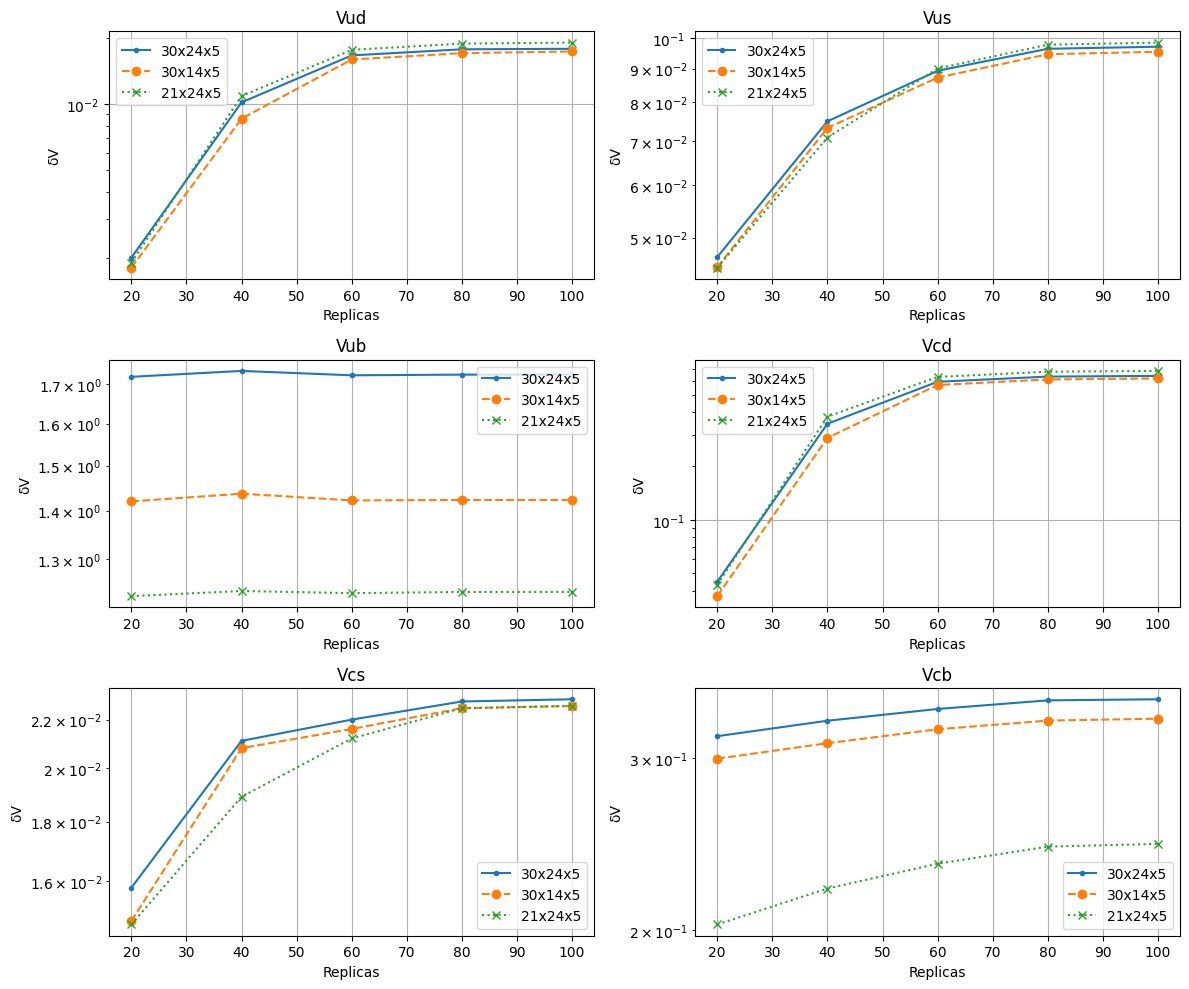

In [1480]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()

for i, k in enumerate(["Vud", "Vus", "Vub", "Vcd", "Vcs", "Vcb"]):


    repliche_F_lin_1e4 = sorted(δV_lin_1e4ev.keys())
    errors_F_lin_1e4 = [δV_lin_1e4ev[r][k] for r in repliche_F_lin_1e4]

    repliche_F_30_14_5 = sorted(δV_lin_1e4ev_30_14_5.keys())
    errors_F_30_14_5 = [δV_lin_1e4ev_30_14_5[r][k] for r in repliche_F_30_14_5]
    
    repliche_F_20_24_5 = sorted(δV_lin_1e4ev_21_24_5.keys())
    errors_F_20_24_5 = [δV_lin_1e4ev_21_24_5[r][k] for r in repliche_F_20_24_5]
    
    repliche_F_2_2_5 = sorted(δV_lin_1e4ev_2_2_5.keys())
    errors_F_2_2_5 = [δV_lin_1e4ev_2_2_5[r][k] for r in repliche_F_2_2_5]
    
    repliche_F_14_19_5 = sorted(δV_lin_1e4ev_14_19_5.keys())
    errors_F_14_19_5 = [δV_lin_1e4ev_14_19_5[r][k] for r in repliche_F_14_19_5]
    
    repliche_F_1_24_5 = sorted(δV_lin_1e4ev_1_24_5.keys())
    errors_F_1_24_5 = [δV_lin_1e4ev_1_24_5[r][k] for r in repliche_F_1_24_5]
    
    axs[i].plot(repliche_F_lin_1e4, errors_F_lin_1e4, marker='.', linestyle='-', label='30x24x5')
    axs[i].plot(repliche_F_30_14_5, errors_F_30_14_5, marker='o', linestyle='--', label='30x14x5')
    axs[i].plot(repliche_F_20_24_5, errors_F_20_24_5, marker='x', linestyle=':', label='21x24x5')
    # axs[i].plot(repliche_F_2_2_5, errors_F_2_2_5, marker='s', linestyle='-.', label='2x2x5')
    # axs[i].plot(repliche_F_14_19_5, errors_F_14_19_5, marker='^', linestyle='--', label='14x19x5')
    # axs[i].plot(repliche_F_1_24_5, errors_F_1_24_5, marker='d', linestyle='-', label='1x24x5')
    axs[i].set_xlabel("Replicas")
    axs[i].set_ylabel("δV")
    axs[i].set_title(k)
    axs[i].grid(True)
    axs[i].set_yscale('log')
    axs[i].legend()
plt.tight_layout()
plt.savefig("plot/delta_all.png", dpi=300, bbox_inches='tight')
plt.show()

